In [2]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt


import gc
import numpy as np
import pickle

import seaborn as sns
from scipy import stats

/home/ywang/.conda/envs/yuzhou3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
VOC_list = ['VOC', 'VOC_INV', 'XYL', 'TOL', 'TERP', 'PAR', 'OLE', 'NVOL', 'MEOH',
               'ISOP', 'IOLE', 'FORM', 'ETOH', 'ETHA', 'ETH', 'ALD2', 'ALDX', 'CB05_ALD2', 
               'CB05_ALDX', 'CB05_BENZENE', 'CB05_ETH', 'CB05_ETHA', 'CB05_ETOH', 
               'CB05_FORM', 'CB05_IOLE', 'CB05_ISOP', 'CB05_MEOH', 'CB05_OLE', 'CB05_PAR', 
               'CB05_TERP', 'CB05_TOL', 'CB05_XYL', 'ETHANOL', 'NHTOG', 'NMOG', 'VOC_INV']
PM_list = ['PM25-PRI', 'PM2_5', 'DIESEL-PM25', 'PAL', 'PCA', 'PCL', 'PEC', 'PFE', 'PK', 
                'PMG', 'PMN', 'PMOTHR', 'PNH4', 'PNO3', 'POC', 'PSI', 'PSO4', 'PTI', "PM25", "DIESEL-PM2"]
NO_list = ['NOX', 'HONO', 'NO', 'NO2']
NH_list = ['NH3']
SO_list = ["SO2"]


In [16]:
emission_data_2014 = pd.read_csv("2014_nei_emission_all.csv",index_col = 0)

/home/ywang/.conda/envs/yuzhou3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [20]:
emission_data_2014["pollutant"] = np.where(emission_data_2014["pollutant_cd"].isin(VOC_list),"VOC",
                             np.where(emission_data_2014["pollutant_cd"].isin(PM_list),"PM2_5",
                             np.where(emission_data_2014["pollutant_cd"].isin(NO_list),"NOx",
                             np.where(emission_data_2014["pollutant_cd"].isin(NH_list),"NH3",
                                      np.where(emission_data_2014["pollutant_cd"].isin(SO_list),"SOx", np.nan)))))

emission_data_2014=emission_data_2014[emission_data_2014["pollutant"].isin(["VOC","PM2_5","NOx","NH3","SOx"])].reset_index(drop = True)


In [27]:
emission_data_2000=pd.read_csv("2000_nei_emission_all.csv",index_col = 0).reset_index(drop = True)

/home/ywang/.conda/envs/yuzhou3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ywang/.conda/envs/yuzhou3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [29]:
emission_data_2000["pollutant"] = np.where(emission_data_2000["POLLUTANT_CODE"].isin(VOC_list),"VOC",
                             np.where(emission_data_2000["POLLUTANT_CODE"].isin(PM_list),"PM2_5",
                             np.where(emission_data_2000["POLLUTANT_CODE"].isin(NO_list),"NOx",
                             np.where(emission_data_2000["POLLUTANT_CODE"].isin(NH_list),"NH3","SOx"))))

In [31]:
emission_data_2002=pd.read_csv("2002_nei_emission_all.csv",index_col = 0).reset_index(drop = True)

In [32]:
emission_data_2002["pollutant"] = np.where(emission_data_2002["POLLUTANT_CODE"].isin(VOC_list),"VOC",
                             np.where(emission_data_2002["POLLUTANT_CODE"].isin(PM_list),"PM2_5",
                             np.where(emission_data_2002["POLLUTANT_CODE"].isin(NO_list),"NOx",
                             np.where(emission_data_2002["POLLUTANT_CODE"].isin(NH_list),"NH3","SOx"))))

In [34]:
emission_data_2001=pd.read_csv("2001_nei_emission_all.csv",index_col = 0).reset_index(drop = True)

/home/ywang/.conda/envs/yuzhou3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ywang/.conda/envs/yuzhou3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [35]:
emission_data_2001["pollutant"] = np.where(emission_data_2001["POLLUTANT_CODE"].isin(VOC_list),"VOC",
                             np.where(emission_data_2001["POLLUTANT_CODE"].isin(PM_list),"PM2_5",
                             np.where(emission_data_2001["POLLUTANT_CODE"].isin(NO_list),"NOx",
                             np.where(emission_data_2001["POLLUTANT_CODE"].isin(NH_list),"NH3","SOx"))))

In [37]:
emission_data_2005=pd.read_csv("2005_nei_emission_all.csv",index_col = 0).reset_index(drop = True)

/home/ywang/.conda/envs/yuzhou3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ywang/.conda/envs/yuzhou3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [38]:
emission_data_2005["pollutant"] = np.where(emission_data_2005["POLLUTANT_CODE"].isin(VOC_list),"VOC",
                             np.where(emission_data_2005["POLLUTANT_CODE"].isin(PM_list),"PM2_5",
                             np.where(emission_data_2005["POLLUTANT_CODE"].isin(NO_list),"NOx",
                             np.where(emission_data_2005["POLLUTANT_CODE"].isin(NH_list),"NH3","SOx"))))

In [40]:
emission_data_2008=pd.read_csv("2008_nei_emission_all.csv",index_col = 0).reset_index(drop = True)

/home/ywang/.conda/envs/yuzhou3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [41]:
emission_data_2008["pollutant"] = np.where(emission_data_2008["pollutant_cd"].isin(VOC_list),"VOC",
                             np.where(emission_data_2008["pollutant_cd"].isin(PM_list),"PM2_5",
                             np.where(emission_data_2008["pollutant_cd"].isin(NO_list),"NOx",
                             np.where(emission_data_2008["pollutant_cd"].isin(NH_list),"NH3","SOx"))))

In [47]:
emission_data_2011=pd.read_csv("2011_nei_emission_all.csv",index_col = 0).reset_index(drop = True)

/home/ywang/.conda/envs/yuzhou3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [48]:
emission_data_2011["pollutant"] = np.where(emission_data_2011["pollutant_cd"].isin(VOC_list),"VOC",
                             np.where(emission_data_2011["pollutant_cd"].isin(PM_list),"PM2_5",
                             np.where(emission_data_2011["pollutant_cd"].isin(NO_list),"NOx",
                             np.where(emission_data_2011["pollutant_cd"].isin(NH_list),"NH3","SOx"))))

In [50]:
emission_data_1999=pd.read_csv("1999_nei_emission_all.csv",index_col = 0).reset_index(drop = True)

emission_data_1999["pollutant"] = np.where(emission_data_1999["POLLUTANT_CODE"].isin(VOC_list),"VOC",
                             np.where(emission_data_1999["POLLUTANT_CODE"].isin(PM_list),"PM2_5",
                             np.where(emission_data_1999["POLLUTANT_CODE"].isin(NO_list),"NOx",
                             np.where(emission_data_1999["POLLUTANT_CODE"].isin(NH_list),"NH3","SOx"))))

/home/ywang/.conda/envs/yuzhou3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ywang/.conda/envs/yuzhou3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [51]:
emission_data_1998=pd.read_csv("1998_nei_emission_all.csv",index_col = 0).reset_index(drop = True)

emission_data_1998["pollutant"] = np.where(emission_data_1998["POLLUTANT_CODE"].isin(VOC_list),"VOC",
                             np.where(emission_data_1998["POLLUTANT_CODE"].isin(PM_list),"PM2_5",
                             np.where(emission_data_1998["POLLUTANT_CODE"].isin(NO_list),"NOx",
                             np.where(emission_data_1998["POLLUTANT_CODE"].isin(NH_list),"NH3","SOx"))))

In [52]:
emission_data_1997=pd.read_csv("1997_nei_emission_all.csv",index_col = 0).reset_index(drop = True)

emission_data_1997["pollutant"] = np.where(emission_data_1997["POLLUTANT_CODE"].isin(VOC_list),"VOC",
                             np.where(emission_data_1997["POLLUTANT_CODE"].isin(PM_list),"PM2_5",
                             np.where(emission_data_1997["POLLUTANT_CODE"].isin(NO_list),"NOx",
                             np.where(emission_data_1997["POLLUTANT_CODE"].isin(NH_list),"NH3","SOx"))))

In [53]:
emission_data_1996=pd.read_csv("1996_nei_emission_all.csv",index_col = 0).reset_index(drop = True)

emission_data_1996["pollutant"] = np.where(emission_data_1996["POLLUTANT_CODE"].isin(VOC_list),"VOC",
                             np.where(emission_data_1996["POLLUTANT_CODE"].isin(PM_list),"PM2_5",
                             np.where(emission_data_1996["POLLUTANT_CODE"].isin(NO_list),"NOx",
                             np.where(emission_data_1996["POLLUTANT_CODE"].isin(NH_list),"NH3","SOx"))))

In [54]:
emission_data_1990=pd.read_csv("1990_nei_emission_all.csv",index_col = 0).reset_index(drop = True)

emission_data_1990["pollutant"] = np.where(emission_data_1990["POLLUTANT_CODE"].isin(VOC_list),"VOC",
                             np.where(emission_data_1990["POLLUTANT_CODE"].isin(PM_list),"PM2_5",
                             np.where(emission_data_1990["POLLUTANT_CODE"].isin(NO_list),"NOx",
                             np.where(emission_data_1990["POLLUTANT_CODE"].isin(NH_list),"NH3","SOx"))))

In [56]:
emission_data_2017 = emission_data_2017[emission_data_2017["region"]<12].reset_index(drop = True)

In [57]:
emission_data_2014 = emission_data_2014[emission_data_2014["fips_state_code"]<85].reset_index(drop = True)

# Emission reduction rate from 1990 to 2014

## By sector only

In [58]:
emission_sum_sector = emission_data_2017.groupby("sector")["total_emissions"].sum().reset_index().rename(columns = {"total_emissions":"emission_2017"})

In [59]:
emission_sum_sector["emission_2014"] = list(emission_data_2014.groupby("sector")["total_emissions"].sum())

In [65]:
emission_sum_sector["emission_2011"] = list(emission_data_2011.groupby(["sector"])["total_emissions"].sum())

In [64]:
emission_sum_sector["emission_2008"] = list(emission_data_2008.groupby(["sector"])["total_emissions"].sum())

In [63]:
emission_sum_sector["emission_2005"] = list(emission_data_2005.groupby(["sector"])["Annual Emissions"].sum())

In [61]:
emission_sum_sector["emission_2002"] = list(emission_data_2002.groupby("sector")["total_emissions"].sum())

In [62]:
emission_sum_sector["emission_2001"] = list(emission_data_2001.groupby(["sector"])["total_emissions"].sum())

In [60]:
emission_sum_sector["emission_2000"] = list(emission_data_2000.groupby("sector")["total_emissions"].sum())

In [68]:
list(emission_data_1998.groupby("sector")["total_emissions"].sum()).append(0)

In [69]:
emission_sum_sector["emission_1999"] = list(emission_data_1999.groupby("sector")["total_emissions"].sum())
list(emission_data_1998.groupby("sector")["total_emissions"].sum()).append(0)
list_1998 = list(emission_data_1998.groupby("sector")["total_emissions"].sum())
list_1997 = list(emission_data_1997.groupby("sector")["total_emissions"].sum())
list_1996 = list(emission_data_1996.groupby("sector")["total_emissions"].sum())
list_1990 = list(emission_data_1990.groupby("sector")["total_emissions"].sum())
emission_sum_sector["emission_1998"] = list_1998
emission_sum_sector["emission_1997"] = list_1997
emission_sum_sector["emission_1996"] = list_1996
emission_sum_sector["emission_1990"] = list_1990

In [70]:
sector = ['Ag.',
 'Coal Elec.',
 'Const.',
 'Cooking',
 'Diesel HD Veh.',
 'Misc.',
 'Misc.',
 'Gas LD Veh.',
 'Industrial',
 'Misc.',
 'Non-coal Elec.',
 'Offroad',
 'Res. Gas',
 'Res. Other',
 'Res. Wood',
 'Road Dst.']

In [76]:
year_list = [1990,1996,1997,1998,1999,2000,2001,2002,2005,2008,2011,2014,2017]

In [79]:
year_array = np.array(year_list, dtype=np.float)

In [81]:
total_emis_list = emission_sum_sector.sum(axis = 0).values[1:].astype(np.float)

In [88]:
emission_sum_sector_new_rename = emission_sum_sector.rename(columns = {"emission_1990":1990,
                                                                       "emission_1996":1996,
                                        "emission_1997":1997,
                                        "emission_1998":1998,
                                        "emission_1999":1999,
                                        "emission_2000":2000,
                                        "emission_2001":2001,
                                        "emission_2002":2002,
                                        "emission_2005":2005,
                                        "emission_2008":2008,
                                        "emission_2011":2011,
                                        "emission_2014":2014,
                                        "emission_2017":2017})

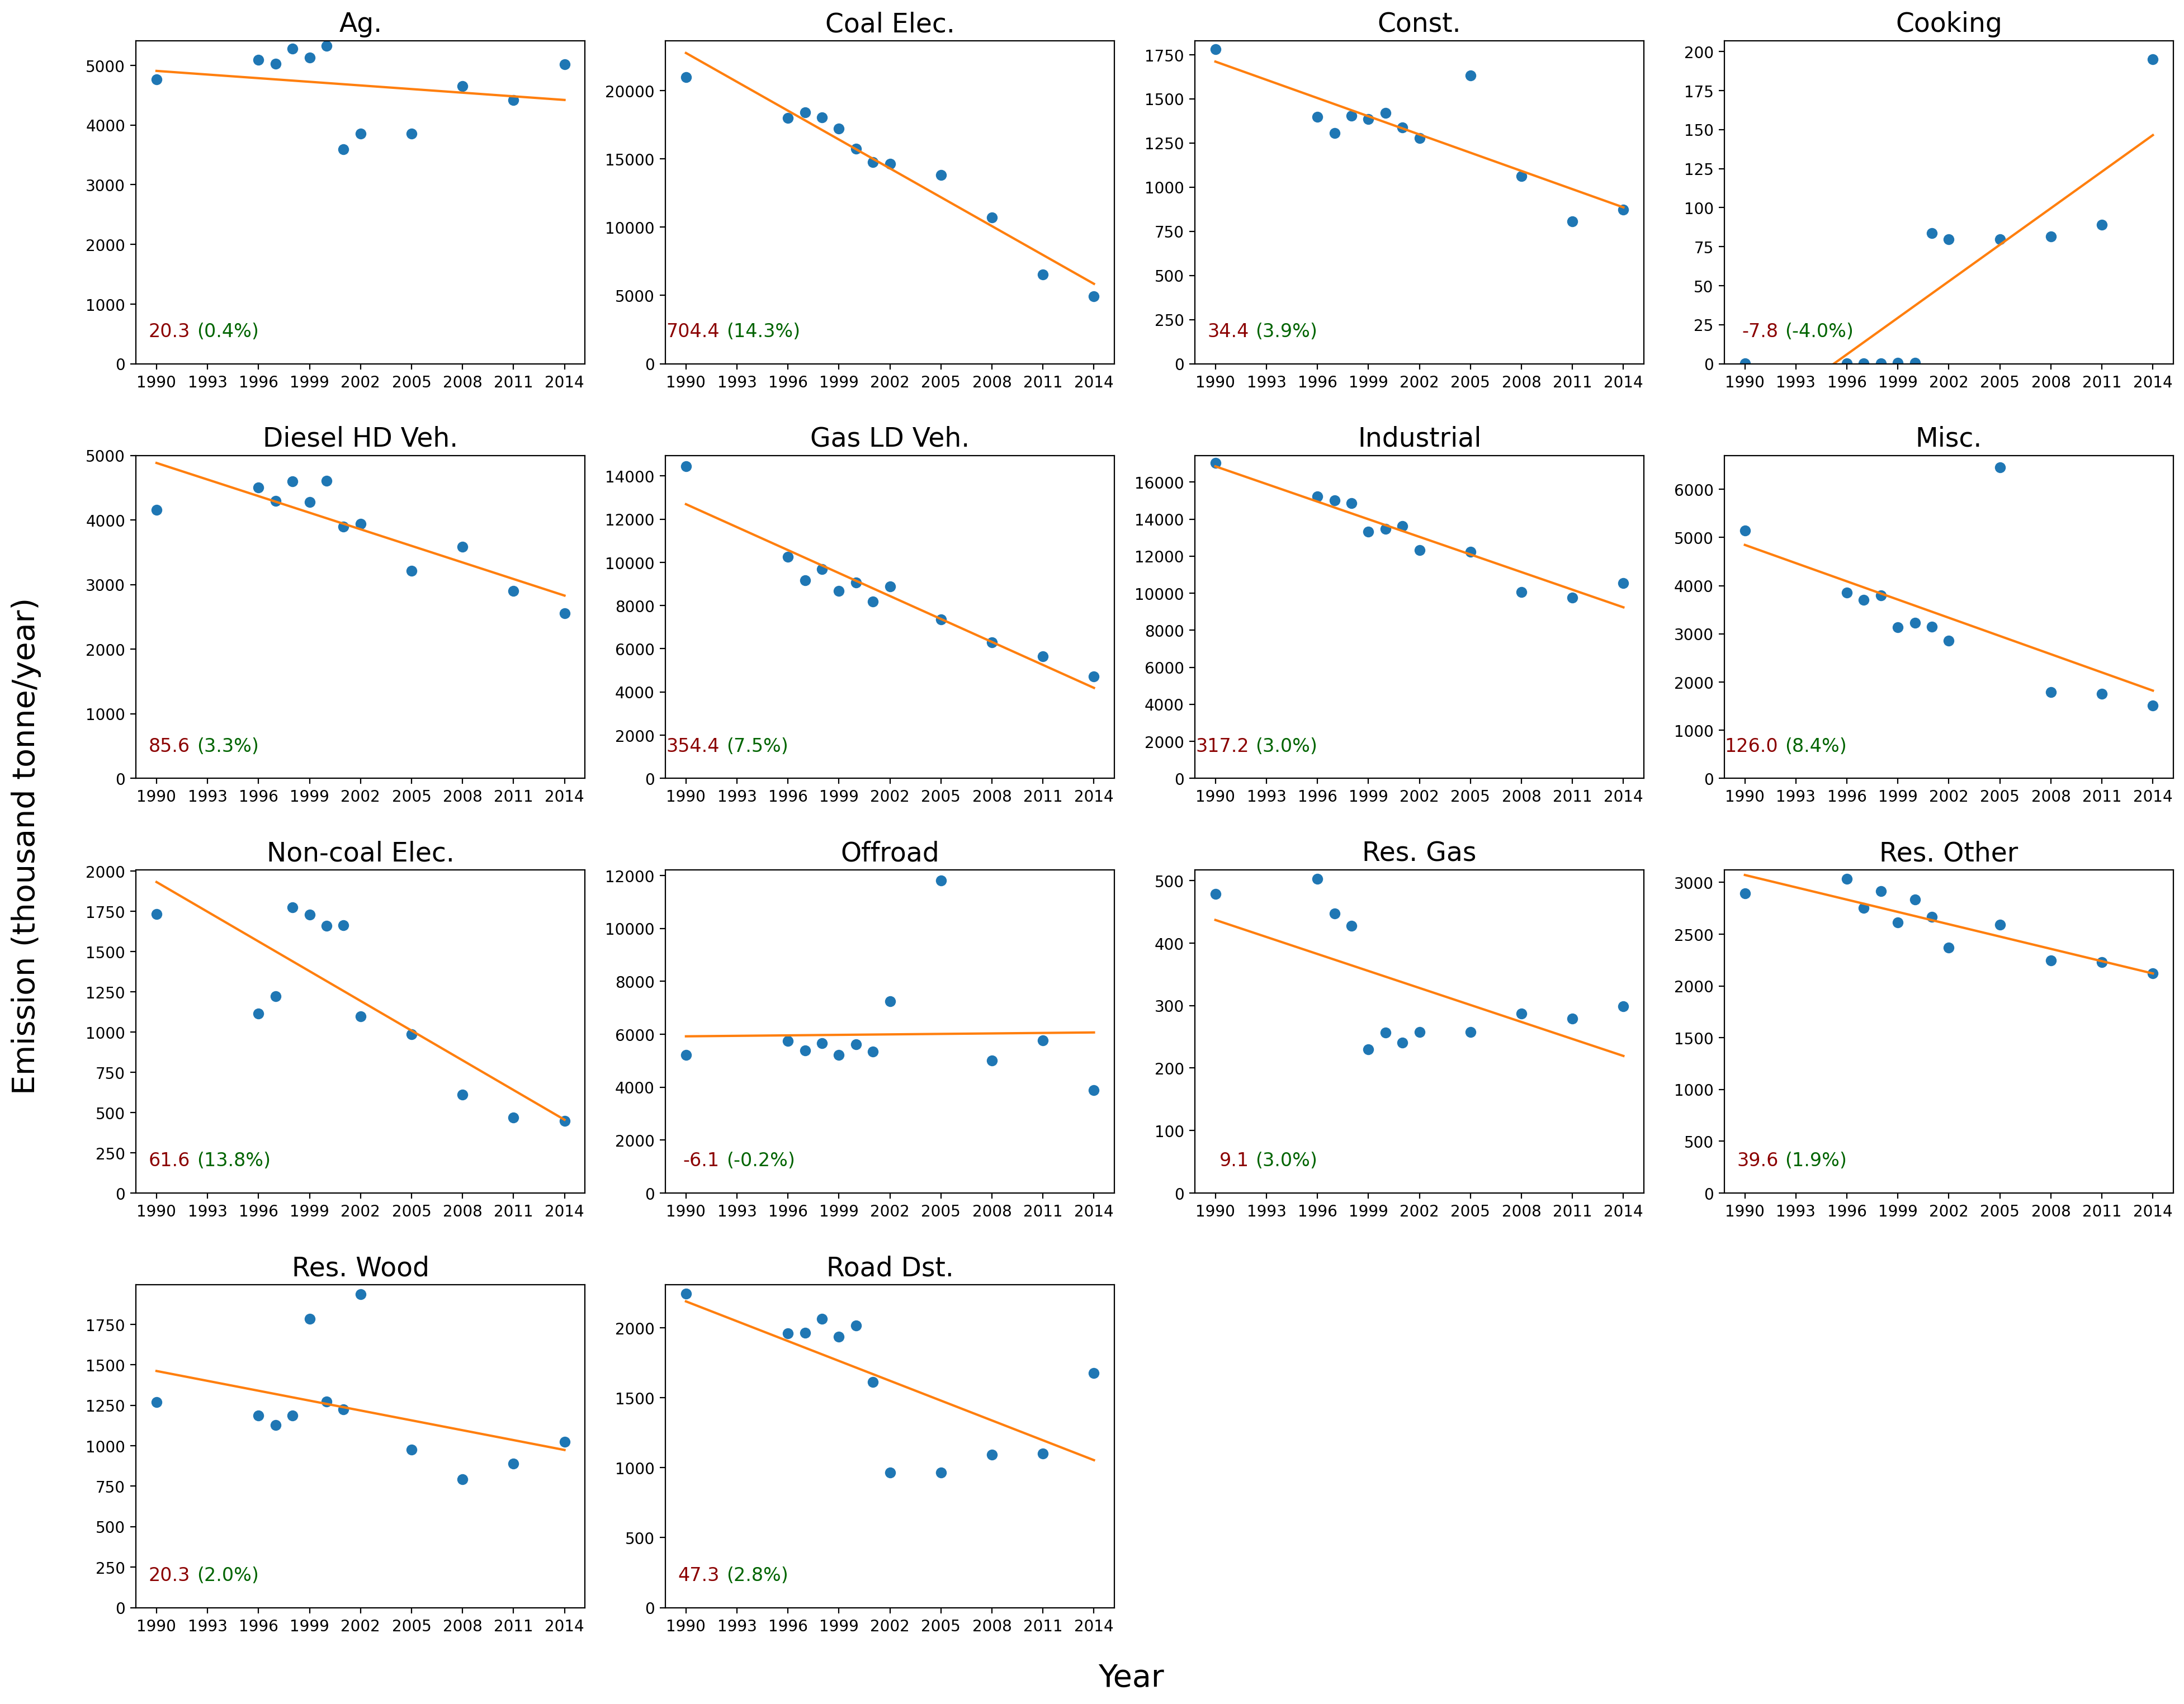

In [92]:
fig = plt.figure(figsize=(19,12),dpi = 200)
#fig.suptitle("Disparity",fontsize = 22)
slope_list_9014 = []
for i in range(14):
    ax = plt.subplot(4,4, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    test = emission_sum_sector_new_rename.iloc[[i]]
    cols_to_keep = [c for c in test.columns[1:13] if test.loc[i,c] >10]
    test = test[cols_to_keep]
    
    emis_list_i = test.loc[i].values.astype(float)/1e3
    year_array_i = test.columns.values.astype(int)
    ax.plot(year_array_i,emis_list_i, 'o')
    m, b = np.polyfit(year_array_i,emis_list_i, 1)
    slope_list_9014.append(-m)
    ax.plot(year_array_i, m*year_array_i+b)
    ax.set_xticks([1990,1993,1996,1999,2002,2005,2008,2011,2014])
    #ax.axis('off')
    # set the title
    ax.set_title(emission_sum_sector_new_rename["sector_m"][i],size = 17)
    ax.set_ylim(ymin=0)
    # set the aspect
    ax.text(0.12, 0.1, round(-m,1),
     horizontalalignment='right',
     verticalalignment='center',
     transform = ax.transAxes, color = "darkred",size = 12)
    ax.text(0.135, 0.1, "("+str(round(-m/emis_list_i[-1]*100,1))+"%)",
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes, color = "darkgreen",size = 12)

    # set the aspect
    # adjustable datalim ensure that the plots have the same axes size
    #ax.set_aspect('equal', adjustable='datalim')
fig.text(0.5, -0.02, 'Year', ha='center', va='center',size = 20)
fig.text(-0.02, 0.6, 'Emission (thousand tonne/year)', ha='center', va='center', rotation='vertical',size = 20)
    # adjustable datalim ensure that the plots have the same axes size
    #ax.set_aspect('equal', adjustable='datalim')
plt.tight_layout()
fig.subplots_adjust(top=1.2)


In [134]:
emission_sum_sector_new_rename["reduction_slope"] = [i/1e3 for i in slope_list_9014]

In [136]:
emission_sum_sector_new_rename

sector_m          1990          1996          1997          1998  \
0              Ag.  4.763760e+06  5.098242e+06  5.032352e+06  5.286417e+06   
1       Coal Elec.  2.098546e+07  1.800370e+07  1.842306e+07  1.803765e+07   
2           Const.  1.779912e+06  1.399408e+06  1.304780e+06  1.404719e+06   
3          Cooking  8.992000e+01  9.442000e+01  9.689000e+01  9.798000e+01   
4   Diesel HD Veh.  4.161911e+06  4.506230e+06  4.294834e+06  4.596357e+06   
5      Gas LD Veh.  1.443777e+07  1.024659e+07  9.156430e+06  9.684960e+06   
6       Industrial  1.704905e+07  1.521540e+07  1.501224e+07  1.486452e+07   
7            Misc.  5.145536e+06  3.854241e+06  3.699857e+06  3.802110e+06   
8   Non-coal Elec.  1.733813e+06  1.114072e+06  1.223302e+06  1.776270e+06   
9          Offroad  5.218653e+06  5.752824e+06  5.384062e+06  5.659195e+06   
10        Res. Gas  4.787948e+05  5.027276e+05  4.471360e+05  4.278048e+05   
11      Res. Other  2.895671e+06  3.034801e+06  2.753258e+06  2.913855e+06   
12       Res. Wood  1.271200e+06  1.186719e+06  1.128061e+06  1.186719e+06   
13       Road Dst.  2.244771e+06  1.960981e+06  1.963305e+06  2.065867e+06   

            1999          2000          2001          2002          2005  \
0   5.134981e+06  5.326368e+06  3.591978e+06  3.859033e+06  3.859033e+06   
1   1.722830e+07  1.572558e+07  1.474294e+07  1.463276e+07  1.379927e+07   
2   1.386358e+06  1.420177e+06  1.339071e+06  1.276969e+06  1.630786e+06   
3   4.122590e+02  4.250060e+02  8.357180e+04  7.982318e+04  7.982318e+04   
4   4.275921e+06  4.606158e+06  3.899189e+06  3.944645e+06  3.215752e+06   
5   8.679802e+06  9.063007e+06  8.181320e+06  8.874709e+06  7.362223e+06   
6   1.331335e+07  1.346690e+07  1.362115e+07  1.231402e+07  1.223057e+07   
7   3.134431e+06  3.230442e+06  3.145523e+06  2.852386e+06  6.454548e+06   
8   1.729996e+06  1.661501e+06  1.663117e+06  1.097252e+06  9.866418e+05   
9   5.221728e+06  5.608087e+06  5.348668e+06  7.235063e+06  1.180620e+07   
10  2.302456e+05  2.572017e+05  2.409993e+05  2.578732e+05  2.578732e+05   
11  2.611770e+06  2.836672e+06  2.664421e+06  2.372007e+06  2.589001e+06   
12  1.786029e+06  1.274541e+06  1.225013e+06  1.937992e+06  9.764761e+05   
13  1.936499e+06  2.017456e+06  1.615146e+06  9.649934e+05  9.649730e+05   

            2008          2011          2014          2017  reduction_slope  
0   4.651835e+06  4.422843e+06  5.014837e+06  5.308887e+06         0.020287  
1   1.070655e+07  6.516581e+06  4.924165e+06  2.413432e+06         0.704382  
2   1.062895e+06  8.050594e+05  8.712013e+05  6.652666e+05         0.034401  
3   8.151160e+04  8.904271e+04  1.950515e+05  2.393068e+05        -0.007803  
4   3.582351e+06  2.904682e+06  2.558318e+06  1.676917e+06         0.085591  
5   6.297229e+06  5.644096e+06  4.720633e+06  3.596323e+06         0.354387  
6   1.007618e+07  9.763819e+06  1.054516e+07  9.132201e+06         0.317228  
7   1.791113e+06  1.751294e+06  1.507026e+06  1.346562e+06         0.126011  
8   6.104107e+05  4.699522e+05  4.468966e+05  3.964010e+05         0.061566  
9   5.003378e+06  5.772283e+06  3.886340e+06  2.837905e+06        -0.006092  
10  2.873571e+05  2.788869e+05  2.985451e+05  2.607668e+05         0.009069  
11  2.245144e+06  2.227100e+06  2.122294e+06  2.059828e+06         0.039635  
12  7.919615e+05  8.891267e+05  1.023951e+06  1.072648e+06         0.020335  
13  1.092062e+06  1.101087e+06  1.677815e+06  1.564956e+06         0.047299

In [196]:
emission_sum_sector_new_rename.to_csv("../emission_percentage_by_sector.csv")

In [141]:
emission_sum_sector_new_rename["change_percentage_14"] = emission_sum_sector_new_rename["reduction_slope"]/emission_sum_sector_new_rename["2014"]*1e6*100

In [142]:
emission_sum_sector_new_rename

sector_m          1990          1996          1997          1998  \
0              Ag.  4.763760e+06  5.098242e+06  5.032352e+06  5.286417e+06   
1       Coal Elec.  2.098546e+07  1.800370e+07  1.842306e+07  1.803765e+07   
2           Const.  1.779912e+06  1.399408e+06  1.304780e+06  1.404719e+06   
3          Cooking  8.992000e+01  9.442000e+01  9.689000e+01  9.798000e+01   
4   Diesel HD Veh.  4.161911e+06  4.506230e+06  4.294834e+06  4.596357e+06   
5      Gas LD Veh.  1.443777e+07  1.024659e+07  9.156430e+06  9.684960e+06   
6       Industrial  1.704905e+07  1.521540e+07  1.501224e+07  1.486452e+07   
7            Misc.  5.145536e+06  3.854241e+06  3.699857e+06  3.802110e+06   
8   Non-coal Elec.  1.733813e+06  1.114072e+06  1.223302e+06  1.776270e+06   
9          Offroad  5.218653e+06  5.752824e+06  5.384062e+06  5.659195e+06   
10        Res. Gas  4.787948e+05  5.027276e+05  4.471360e+05  4.278048e+05   
11      Res. Other  2.895671e+06  3.034801e+06  2.753258e+06  2.913855e+06   
12       Res. Wood  1.271200e+06  1.186719e+06  1.128061e+06  1.186719e+06   
13       Road Dst.  2.244771e+06  1.960981e+06  1.963305e+06  2.065867e+06   

            1999          2000          2001          2002          2005  \
0   5.134981e+06  5.326368e+06  3.591978e+06  3.859033e+06  3.859033e+06   
1   1.722830e+07  1.572558e+07  1.474294e+07  1.463276e+07  1.379927e+07   
2   1.386358e+06  1.420177e+06  1.339071e+06  1.276969e+06  1.630786e+06   
3   4.122590e+02  4.250060e+02  8.357180e+04  7.982318e+04  7.982318e+04   
4   4.275921e+06  4.606158e+06  3.899189e+06  3.944645e+06  3.215752e+06   
5   8.679802e+06  9.063007e+06  8.181320e+06  8.874709e+06  7.362223e+06   
6   1.331335e+07  1.346690e+07  1.362115e+07  1.231402e+07  1.223057e+07   
7   3.134431e+06  3.230442e+06  3.145523e+06  2.852386e+06  6.454548e+06   
8   1.729996e+06  1.661501e+06  1.663117e+06  1.097252e+06  9.866418e+05   
9   5.221728e+06  5.608087e+06  5.348668e+06  7.235063e+06  1.180620e+07   
10  2.302456e+05  2.572017e+05  2.409993e+05  2.578732e+05  2.578732e+05   
11  2.611770e+06  2.836672e+06  2.664421e+06  2.372007e+06  2.589001e+06   
12  1.786029e+06  1.274541e+06  1.225013e+06  1.937992e+06  9.764761e+05   
13  1.936499e+06  2.017456e+06  1.615146e+06  9.649934e+05  9.649730e+05   

            2008          2011          2014          2017  reduction_slope  \
0   4.651835e+06  4.422843e+06  5.014837e+06  5.308887e+06         0.020287   
1   1.070655e+07  6.516581e+06  4.924165e+06  2.413432e+06         0.704382   
2   1.062895e+06  8.050594e+05  8.712013e+05  6.652666e+05         0.034401   
3   8.151160e+04  8.904271e+04  1.950515e+05  2.393068e+05        -0.007803   
4   3.582351e+06  2.904682e+06  2.558318e+06  1.676917e+06         0.085591   
5   6.297229e+06  5.644096e+06  4.720633e+06  3.596323e+06         0.354387   
6   1.007618e+07  9.763819e+06  1.054516e+07  9.132201e+06         0.317228   
7   1.791113e+06  1.751294e+06  1.507026e+06  1.346562e+06         0.126011   
8   6.104107e+05  4.699522e+05  4.468966e+05  3.964010e+05         0.061566   
9   5.003378e+06  5.772283e+06  3.886340e+06  2.837905e+06        -0.006092   
10  2.873571e+05  2.788869e+05  2.985451e+05  2.607668e+05         0.009069   
11  2.245144e+06  2.227100e+06  2.122294e+06  2.059828e+06         0.039635   
12  7.919615e+05  8.891267e+05  1.023951e+06  1.072648e+06         0.020335   
13  1.092062e+06  1.101087e+06  1.677815e+06  1.564956e+06         0.047299   

    change_percentage_14  
0               0.404531  
1              14.304603  
2               3.948673  
3              -4.000694  
4               3.345599  
5               7.507197  
6               3.008280  
7               8.361548  
8              13.776434  
9              -0.156745  
10              3.037900  
11              1.867545  
12              1.985925  
13              2.819094

In [144]:
emission_sum_sector_new_sorted  = emission_sum_sector_new_rename.sort_values(by = "reduction_slope").reset_index(drop = True)

In [239]:
emission_sum_sector_new_rename_sort = emission_sum_sector_new_rename.sort_values(by = "reduction_slope").reset_index(drop = True)

emission_sum_sector_new_rename_sort_relative = emission_sum_sector_new_rename.sort_values(by = "change_percentage_14").reset_index(drop = True)

## By Pollutant & Sector

In [99]:
emission_sum_sector_2017 = emission_data_2017.groupby(["sector","pollutant"])["total_emissions"].sum().reset_index().rename(columns = {"total_emissions":"emission_2017"})
emission_sum_sector_2014 = emission_data_2014.groupby(["sector","pollutant"])["total_emissions"].sum().reset_index().rename(columns = {"total_emissions":"emission_2014"})
emission_sum_sector_2011 = emission_data_2011.groupby(["Sector_yuzhou","pollutant"])["total_emissions"].sum().reset_index().rename(columns = {"total_emissions":"emission_2011"})
emission_sum_sector_2008 = emission_data_2008.groupby(["Sector_yuzhou","pollutant"])["total_emissions"].sum().reset_index().rename(columns = {"total_emissions":"emission_2008"})
emission_sum_sector_2005 = emission_data_2005.groupby(["Sector_yuzhou","pollutant"])["Annual Emissions"].sum().reset_index().rename(columns = {"Annual Emissions":"emission_2005"})
emission_sum_sector_2002 = emission_data_2002.groupby(["sector","pollutant"])["total_emissions"].sum().reset_index().rename(columns = {"total_emissions":"emission_2002"})
emission_sum_sector_2001 = emission_data_2001.groupby(["sector","pollutant"])["total_emissions"].sum().reset_index().rename(columns = {"total_emissions":"emission_2001"})
emission_sum_sector_2000 = emission_data_2000.groupby(["sector","pollutant"])["total_emissions"].sum().reset_index().rename(columns = {"total_emissions":"emission_2000"})
emission_sum_sector_1999 = emission_data_1999.groupby(["sector","pollutant"])["total_emissions"].sum().reset_index().rename(columns = {"total_emissions":"emission_1999"})
emission_sum_sector_1998 = emission_data_1998.groupby(["sector","pollutant"])["total_emissions"].sum().reset_index().rename(columns = {"total_emissions":"emission_1998"})
emission_sum_sector_1997 = emission_data_1997.groupby(["sector","pollutant"])["total_emissions"].sum().reset_index().rename(columns = {"total_emissions":"emission_1997"})
emission_sum_sector_1996 = emission_data_1996.groupby(["sector","pollutant"])["total_emissions"].sum().reset_index().rename(columns = {"total_emissions":"emission_1996"})
emission_sum_sector_1990 = emission_data_1990.groupby(["sector","pollutant"])["total_emissions"].sum().reset_index().rename(columns = {"total_emissions":"emission_1990"})


In [100]:
emission_sum_sector_pollution = emission_sum_sector_1990.merge(emission_sum_sector_1996, how = "outer").merge(emission_sum_sector_1997, how = "outer").merge(emission_sum_sector_1998, how = "outer").merge(emission_sum_sector_1999, how = "outer").merge(emission_sum_sector_2000, how = "outer").merge(emission_sum_sector_2001, how = "outer").merge(emission_sum_sector_2002, how = "outer").merge(emission_sum_sector_2005, how = "outer").merge(emission_sum_sector_2008, how = "outer").merge(emission_sum_sector_2011, how = "outer").merge(emission_sum_sector_2014, how = "outer").merge(emission_sum_sector_2017, how = "outer")

In [102]:
emission_sum_sector_pollution = emission_sum_sector_pollution.fillna(0)

In [103]:
emission_sum_sector_pollution = emission_sum_sector_pollution[emission_sum_sector_pollution["emission_2014"]>0].reset_index(drop = True)

In [110]:
emission_sum_sector_pollution_new_rename = emission_sum_sector_pollution.rename(columns = {"emission_1990":1990,
                                                                           "emission_1996":1996,
                                        "emission_1997":1997,
                                        "emission_1998":1998,
                                        "emission_1999":1999,
                                        "emission_2000":2000,
                                        "emission_2001":2001,
                                        "emission_2002":2002,
                                        "emission_2005":2005,
                                        "emission_2008":2008,
                                        "emission_2011":2011,
                                        "emission_2014":2014,
                                        "emission_2017":2017})

In [110]:
from math import log10, floor
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

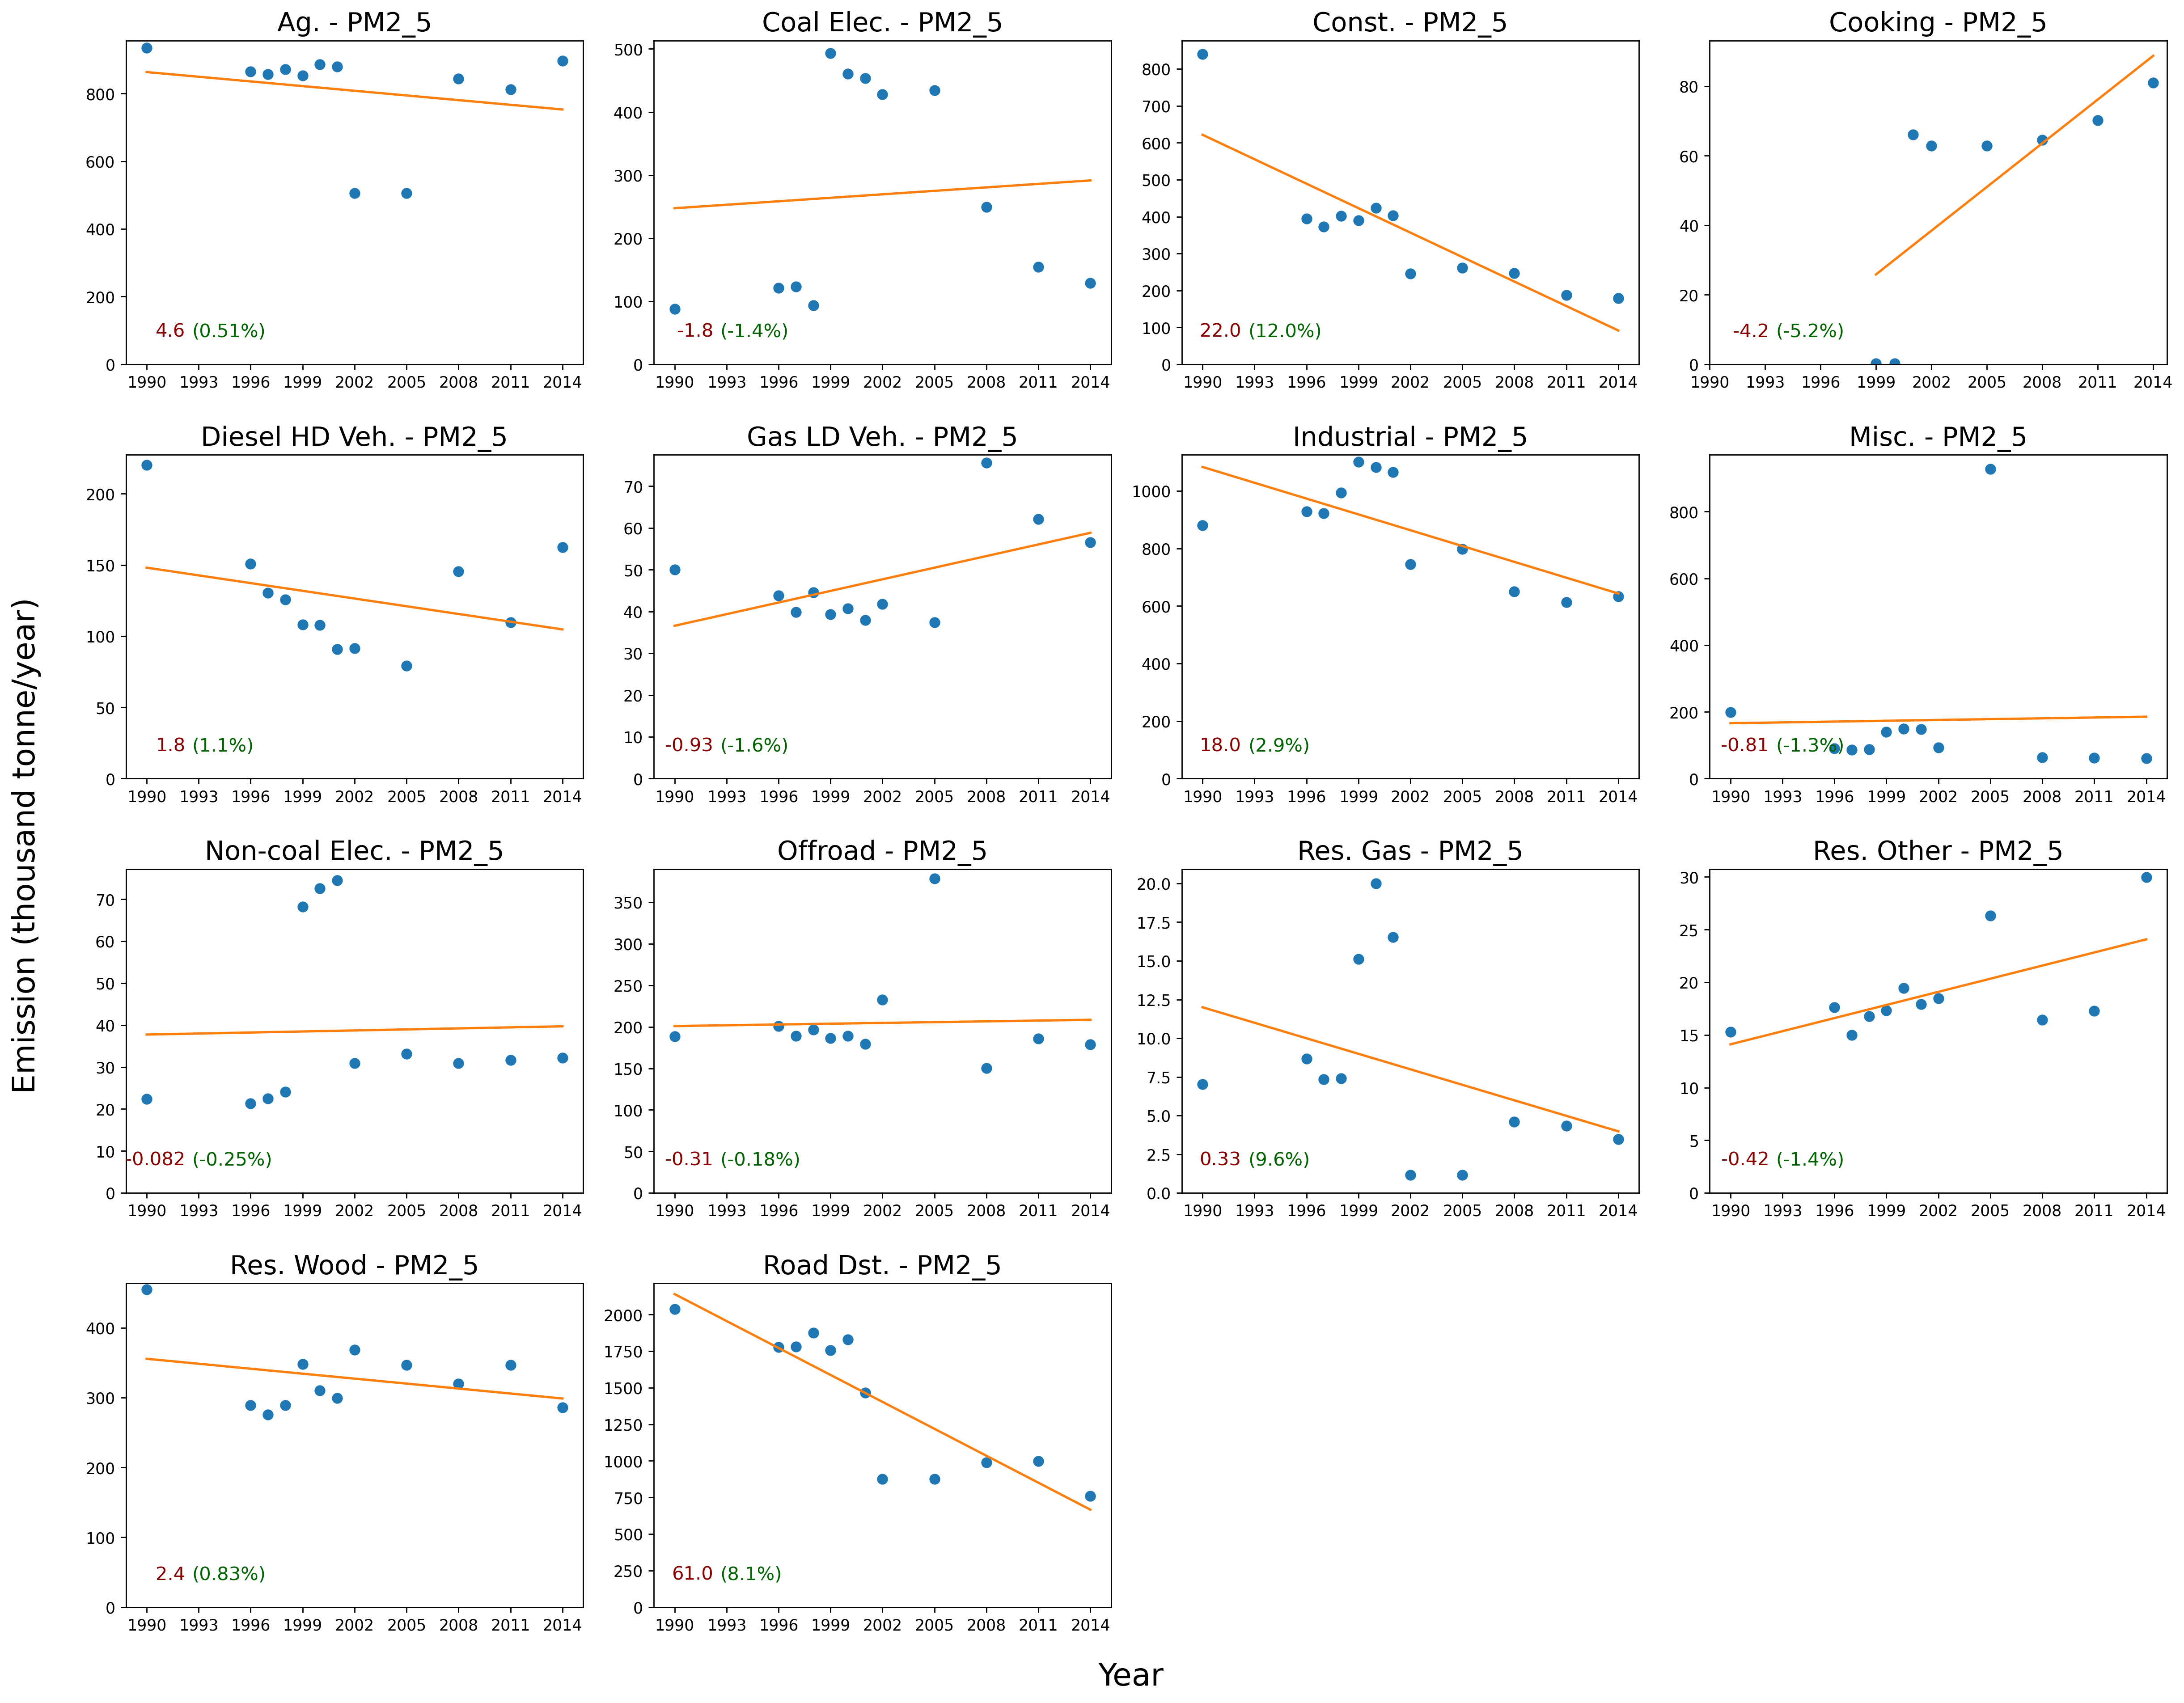

In [115]:
fig = plt.figure(figsize=(19,12),dpi = 250)
#fig.suptitle("Disparity",fontsize = 22)
emission_sum_sector_pollution_new_rename_PM = emission_sum_sector_pollution_new_rename[emission_sum_sector_pollution_new_rename["pollutant"]=="PM2_5"].reset_index(drop = True)
slope_list_PM = []
for i in range(emission_sum_sector_pollution_new_rename_PM.shape[0]):
    ax = plt.subplot(4,4, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    test = emission_sum_sector_pollution_new_rename_PM.iloc[[i]]
    cols_to_keep = [c for c in test.columns[2:14] if test.loc[i,c] >100]
    test = test[cols_to_keep]
    
    emis_list_i = test.loc[i].values.astype(float)/1e3*0.907185
    year_array_i = test.columns.values.astype(int)
    ax.plot(year_array_i,emis_list_i, 'o')
    m, b = np.polyfit(year_array_i,emis_list_i, 1)
    slope_list_PM.append(-m)
    ax.plot(year_array_i, m*year_array_i+b)
    ax.set_xticks([1990,1993,1996,1999,2002,2005,2008,2011,2014])
    #ax.axis('off')
    # set the title
    ax.set_title(emission_sum_sector_pollution_new_rename_PM["sector"][i]+" - "+emission_sum_sector_pollution_new_rename_PM["pollutant"][i],size = 17)
    ax.set_ylim(ymin = 0)
    ax.text(0.13, 0.1, round_sig(-m,2),
     horizontalalignment='right',
     verticalalignment='center',
     transform = ax.transAxes, color = "darkred",size = 12)
    ax.text(0.145, 0.1, "("+str(round_sig(-m/emis_list_i[-1]*100,2))+"%)",
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes, color = "darkgreen",size = 12)

    # set the aspect
    # adjustable datalim ensure that the plots have the same axes size
    #ax.set_aspect('equal', adjustable='datalim')
fig.text(0.5, -0.02, 'Year', ha='center', va='center',size = 20)
fig.text(-0.02, 0.6, 'Emission (thousand tonne/year)', ha='center', va='center', rotation='vertical',size = 20)

plt.tight_layout()
fig.subplots_adjust(top=1.2)


In [106]:
emission_sum_sector_pollution_new_rename_NO

sector pollutant          1990          1996          1997  \
0       Coal Elec.       NOx  5.642114e+06  5.600535e+06  5.643935e+06   
1           Const.       NOx  7.042221e+05  7.782528e+05  7.151521e+05   
2   Diesel HD Veh.       NOx  3.193506e+06  3.940376e+06  3.794236e+06   
3      Gas LD Veh.       NOx  5.766020e+06  4.258137e+06  3.811555e+06   
4       Industrial       NOx  3.719973e+06  3.931257e+06  3.791919e+06   
5            Misc.       NOx  1.552731e+06  1.410086e+06  1.337646e+06   
6   Non-coal Elec.       NOx  1.000676e+06  5.387617e+05  5.919774e+05   
7          Offroad       NOx  3.034920e+06  3.346129e+06  3.153717e+06   
8         Res. Gas       NOx  4.492708e+05  4.698097e+05  4.180561e+05   
9       Res. Other       NOx  4.171745e+04  5.739014e+04  5.739671e+04   
10       Res. Wood       NOx  4.586322e+04  3.031865e+04  2.891315e+04   

            1998          1999          2000          2001          2002  \
0   5.435774e+06  4.908214e+06  4.562945e+06  4.207442e+06  4.149549e+06   
1   7.742257e+05  7.629995e+05  7.650700e+05  7.124289e+05  8.218365e+05   
2   4.088776e+06  3.827570e+06  4.178323e+06  3.520016e+06  3.574522e+06   
3   3.994150e+06  3.523996e+06  3.748425e+06  3.442195e+06  3.882677e+06   
4   3.883112e+06  3.362459e+06  3.518335e+06  3.537885e+06  2.984661e+06   
5   1.391855e+06  1.056533e+06  1.139899e+06  1.076156e+06  1.038518e+06   
6   7.695032e+05  7.891371e+05  7.672682e+05  6.980997e+05  5.598590e+05   
7   3.308935e+06  2.969361e+06  3.316106e+06  3.163570e+06  4.082706e+06   
8   3.997683e+05  1.995567e+05  2.201197e+05  2.083296e+05  2.404593e+05   
9   7.580733e+04  7.083533e+04  8.601052e+04  7.514654e+04  8.092638e+04   
10  3.031865e+04  4.221679e+04  3.257161e+04  3.137108e+04  4.075434e+04   

            2005          2008          2011          2014          2017  \
0   3.346785e+06  2.810199e+06  1.791446e+06  1.468488e+06  9.237466e+05   
1   1.085465e+06  7.000049e+05  5.424627e+05  4.598739e+05  3.199137e+05   
2   2.877570e+06  3.198575e+06  2.561463e+06  2.114973e+06  1.399180e+06   
3   3.208180e+06  3.394803e+06  3.088556e+06  2.508065e+06  1.882586e+06   
4   2.930643e+06  2.408797e+06  2.508335e+06  2.313567e+06  2.090355e+06   
5   1.125408e+06  7.532932e+05  6.234693e+05  6.382121e+05  5.419888e+05   
6   4.455070e+05  3.334211e+05  2.986687e+05  2.545891e+05  2.345441e+05   
7   6.685016e+06  2.714329e+06  3.400321e+06  2.161013e+06  1.743488e+06   
8   2.404593e+05  2.300223e+05  2.185643e+05  2.275923e+05  2.054155e+05   
9   1.118965e+05  7.037240e+04  6.855142e+04  6.107903e+04  4.924805e+04   
10  3.837656e+04  3.535882e+04  3.453592e+04  3.064453e+04  3.927223e+04   

    reduction_slope  
0          0.210790  
1          0.008452  
2          0.067775  
3          0.103605  
4          0.079476  
5          0.042484  
6          0.029820  
7          0.001971  
8          0.010841  
9         -0.000847  
10         0.000218

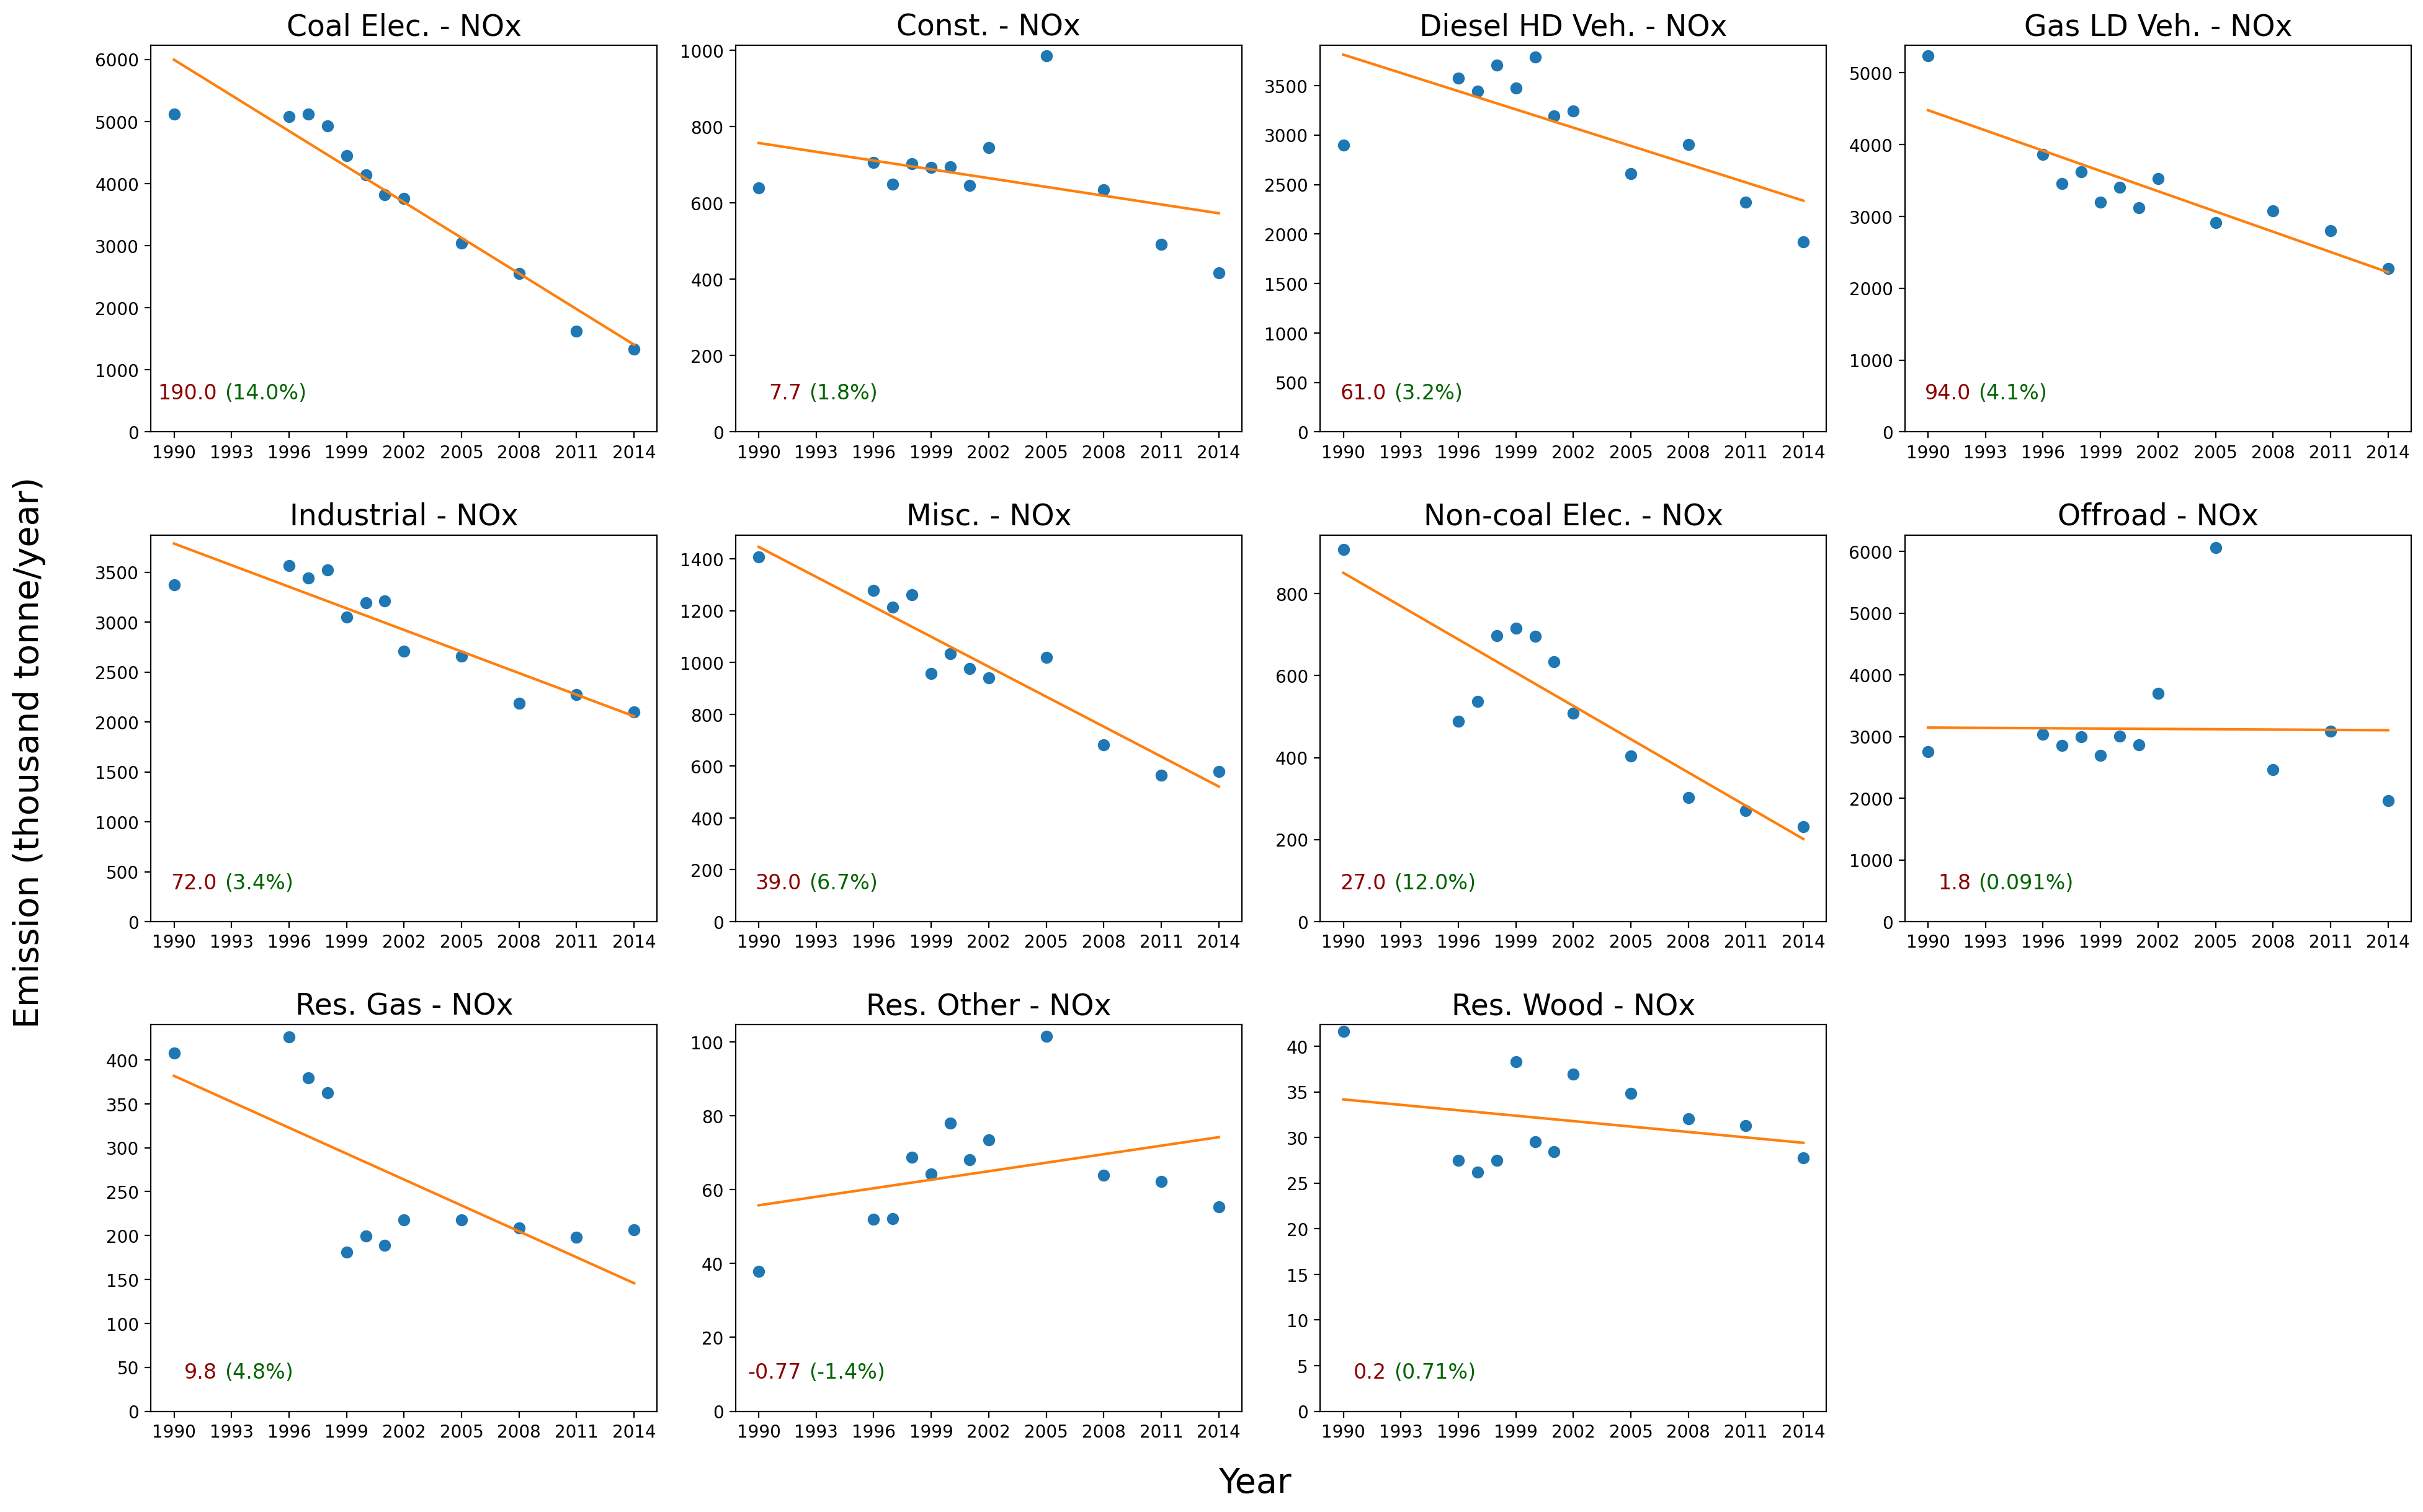

In [116]:
fig = plt.figure(figsize=(19,9.5),dpi = 200)
#fig.suptitle("Disparity",fontsize = 22)
emission_sum_sector_pollution_new_rename_NO = emission_sum_sector_pollution_new_rename[emission_sum_sector_pollution_new_rename["pollutant"]=="NOx"].reset_index(drop = True)
slope_list_NOx = []
for i in range(emission_sum_sector_pollution_new_rename_NO.shape[0]):
    ax = plt.subplot(3,4, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    test = emission_sum_sector_pollution_new_rename_NO.iloc[[i]]
    cols_to_keep = [c for c in test.columns[2:14] if test.loc[i,c] >100]
    test = test[cols_to_keep]
    
    emis_list_i = test.loc[i].values.astype(float)/1e3*0.907185
    year_array_i = test.columns.values.astype(int)
    ax.plot(year_array_i,emis_list_i, 'o')
    m, b = np.polyfit(year_array_i,emis_list_i, 1)
    slope_list_NOx.append(-m)
    ax.plot(year_array_i, m*year_array_i+b)
    ax.set_xticks([1990,1993,1996,1999,2002,2005,2008,2011,2014])
    #ax.axis('off')
    # set the title
    ax.set_title(emission_sum_sector_pollution_new_rename_NO["sector"][i]+" - "+emission_sum_sector_pollution_new_rename_NO["pollutant"][i],size = 17)
    ax.set_ylim(ymin = 0)
    ax.text(0.13, 0.1, round_sig(-m,2),
     horizontalalignment='right',
     verticalalignment='center',
     transform = ax.transAxes, color = "darkred",size = 12)
    ax.text(0.145, 0.1, "("+str(round_sig(-m/emis_list_i[-1]*100,2))+"%)",
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes, color = "darkgreen",size = 12)

    # set the aspect
    # adjustable datalim ensure that the plots have the same axes size
    #ax.set_aspect('equal', adjustable='datalim')
fig.text(0.5, -0.02, 'Year', ha='center', va='center',size = 20)
fig.text(-0.02, 0.6, 'Emission (thousand tonne/year)', ha='center', va='center', rotation='vertical',size = 20)
plt.tight_layout()
fig.subplots_adjust(top=1.2)


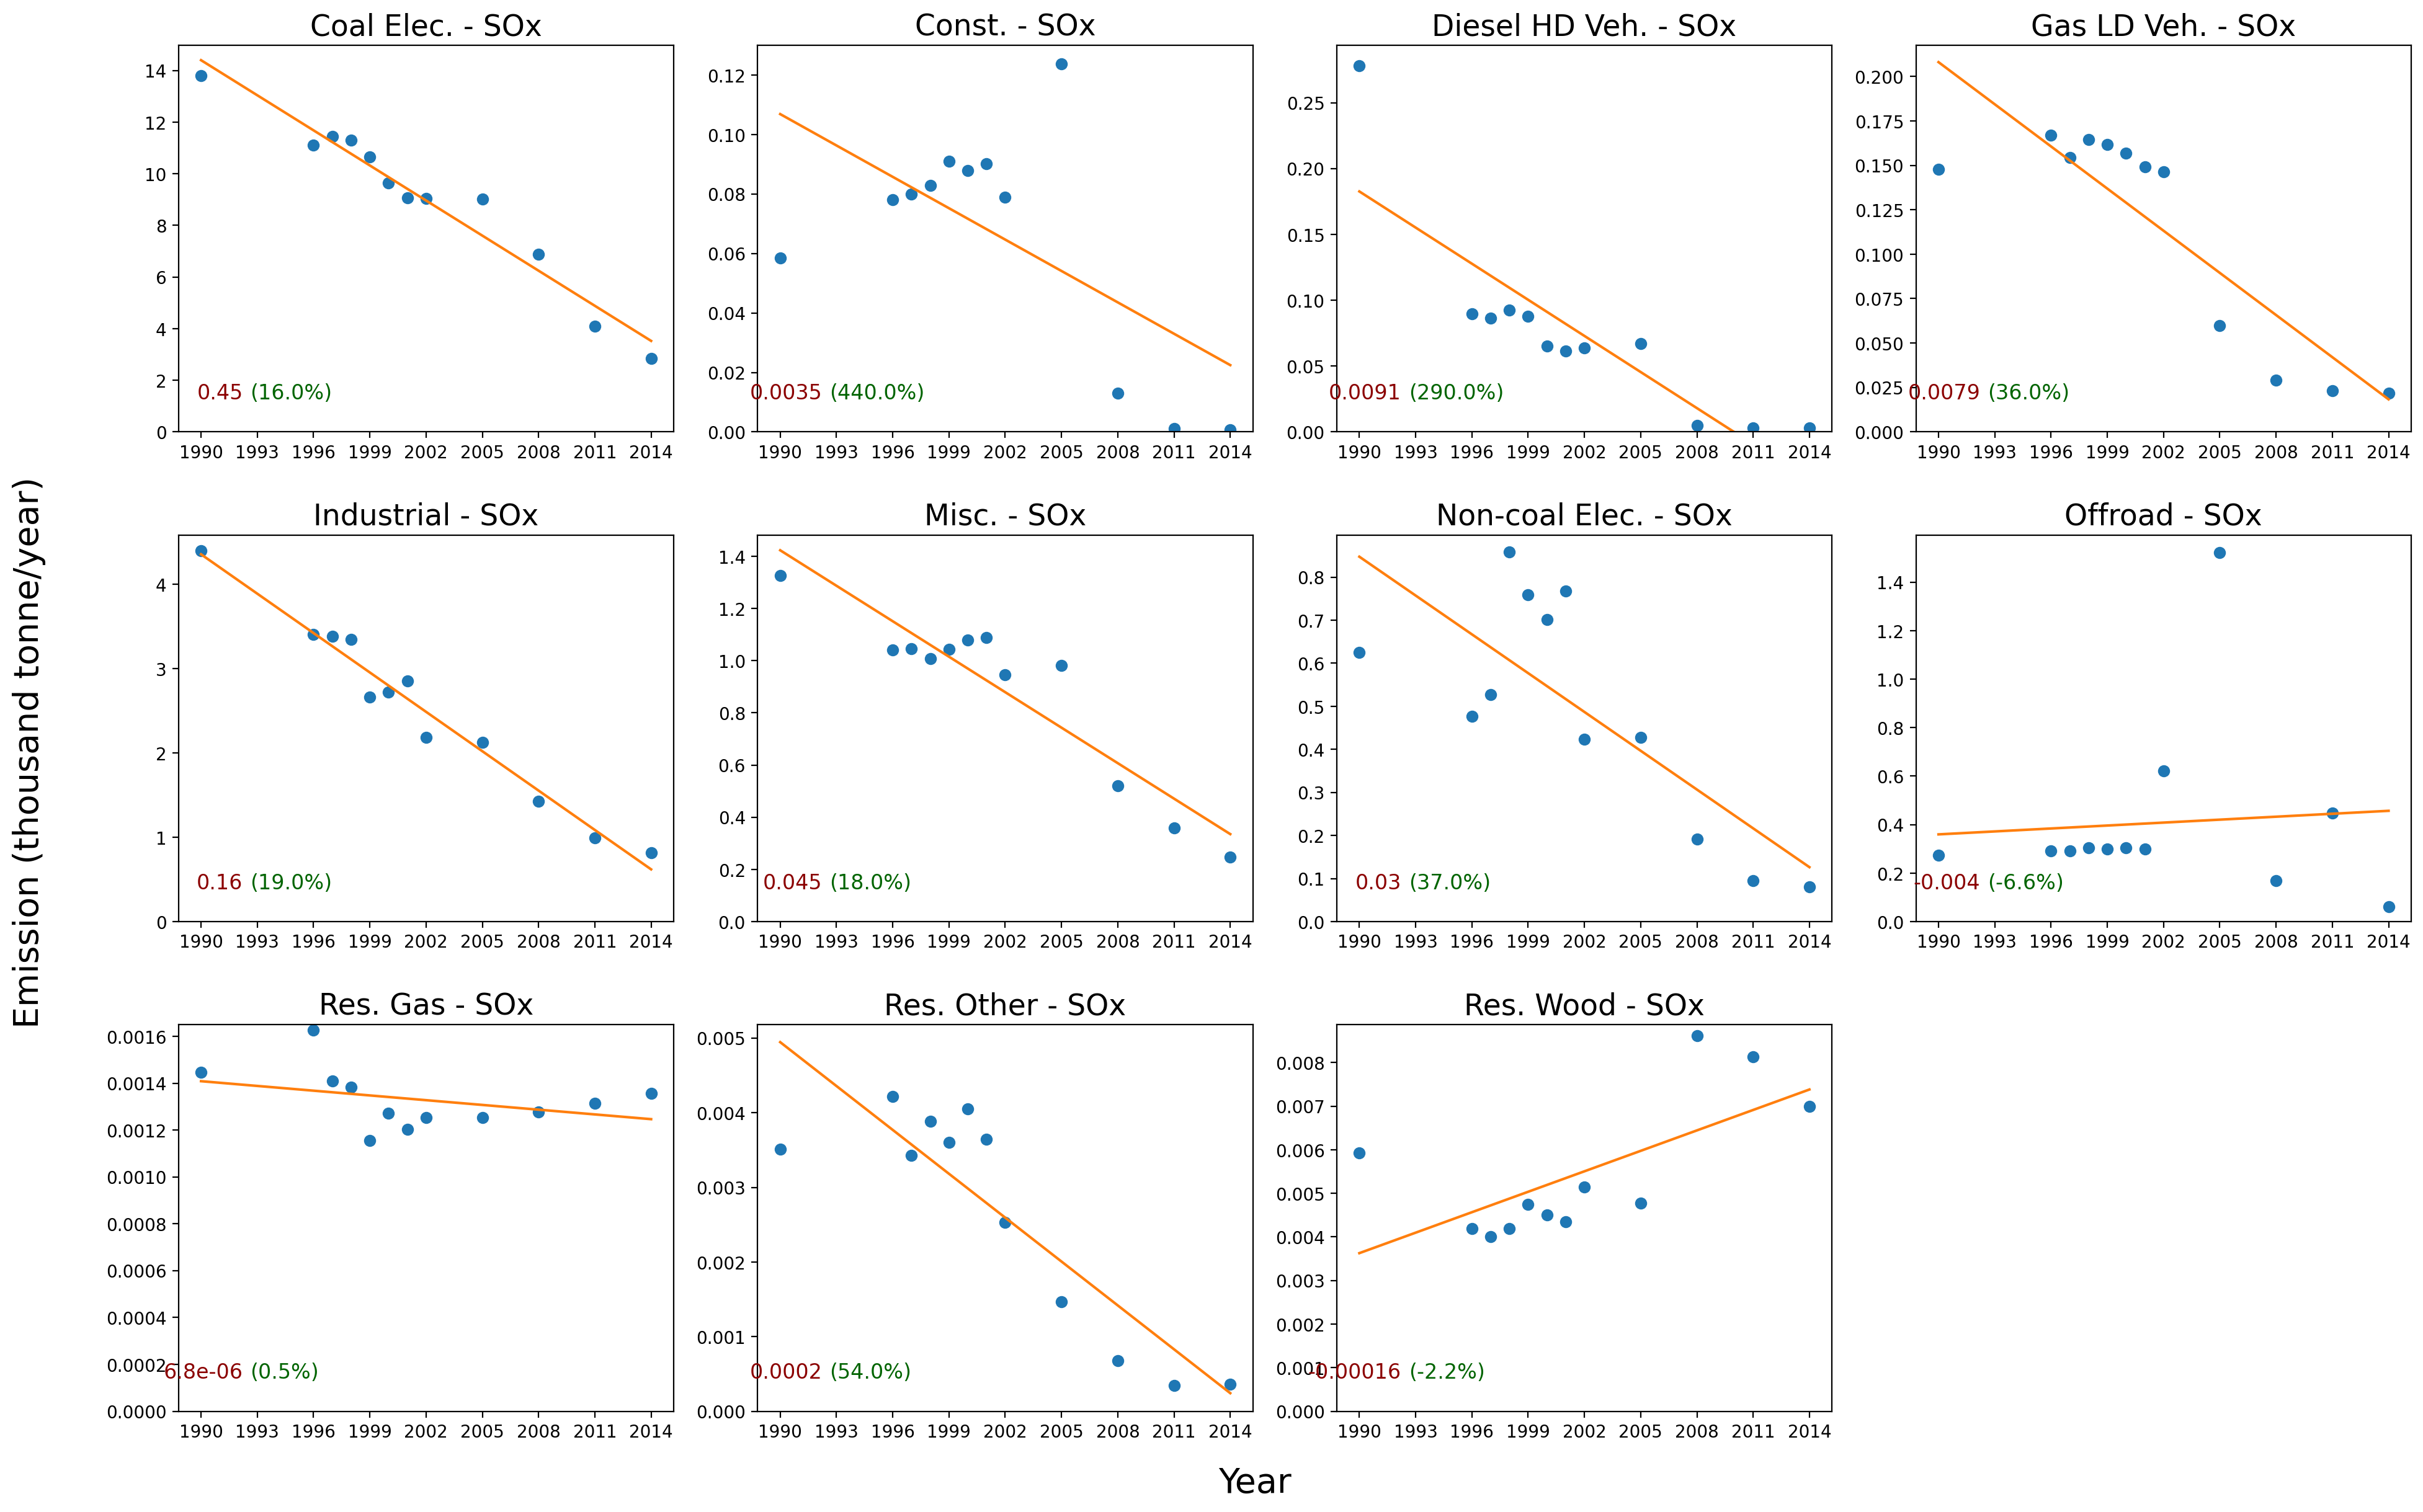

In [117]:
fig = plt.figure(figsize=(19,9.5),dpi = 200)
#fig.suptitle("Disparity",fontsize = 22)
emission_sum_sector_pollution_new_rename_SO = emission_sum_sector_pollution_new_rename[emission_sum_sector_pollution_new_rename["pollutant"]=="SOx"].reset_index(drop = True)
slope_list_SOx = []
for i in range(emission_sum_sector_pollution_new_rename_SO.shape[0]):
    ax = plt.subplot(3,4, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    test = emission_sum_sector_pollution_new_rename_SO.iloc[[i]]
    cols_to_keep = [c for c in test.columns[2:14] if test.loc[i,c] >100.0]
    test = test[cols_to_keep]
    
    emis_list_i = test.loc[i].values.astype(float)/1e6*0.907185
    year_array_i = test.columns.values.astype(int)
    ax.plot(year_array_i,emis_list_i, 'o')
    m, b = np.polyfit(year_array_i,emis_list_i, 1)
    slope_list_SOx.append(-m)
    ax.plot(year_array_i, m*year_array_i+b)
    ax.set_xticks([1990,1993,1996,1999,2002,2005,2008,2011,2014])
    #ax.axis('off')
    # set the title
    ax.set_title(emission_sum_sector_pollution_new_rename_SO["sector"][i]+" - "+emission_sum_sector_pollution_new_rename_SO["pollutant"][i],size = 17)
    ax.set_ylim(ymin = 0)# set the aspect
    ax.text(0.13, 0.1, round_sig(-m,2),
     horizontalalignment='right',
     verticalalignment='center',
     transform = ax.transAxes, color = "darkred",size = 12)
    ax.text(0.145, 0.1, "("+str(round_sig(-m/emis_list_i[-1]*100,2))+"%)",
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes, color = "darkgreen",size = 12)

    # set the aspect
    # adjustable datalim ensure that the plots have the same axes size
    #ax.set_aspect('equal', adjustable='datalim')
fig.text(0.5, -0.02, 'Year', ha='center', va='center',size = 20)
fig.text(-0.02, 0.6, 'Emission (thousand tonne/year)', ha='center', va='center', rotation='vertical',size = 20)
plt.tight_layout()
fig.subplots_adjust(top=1.2)


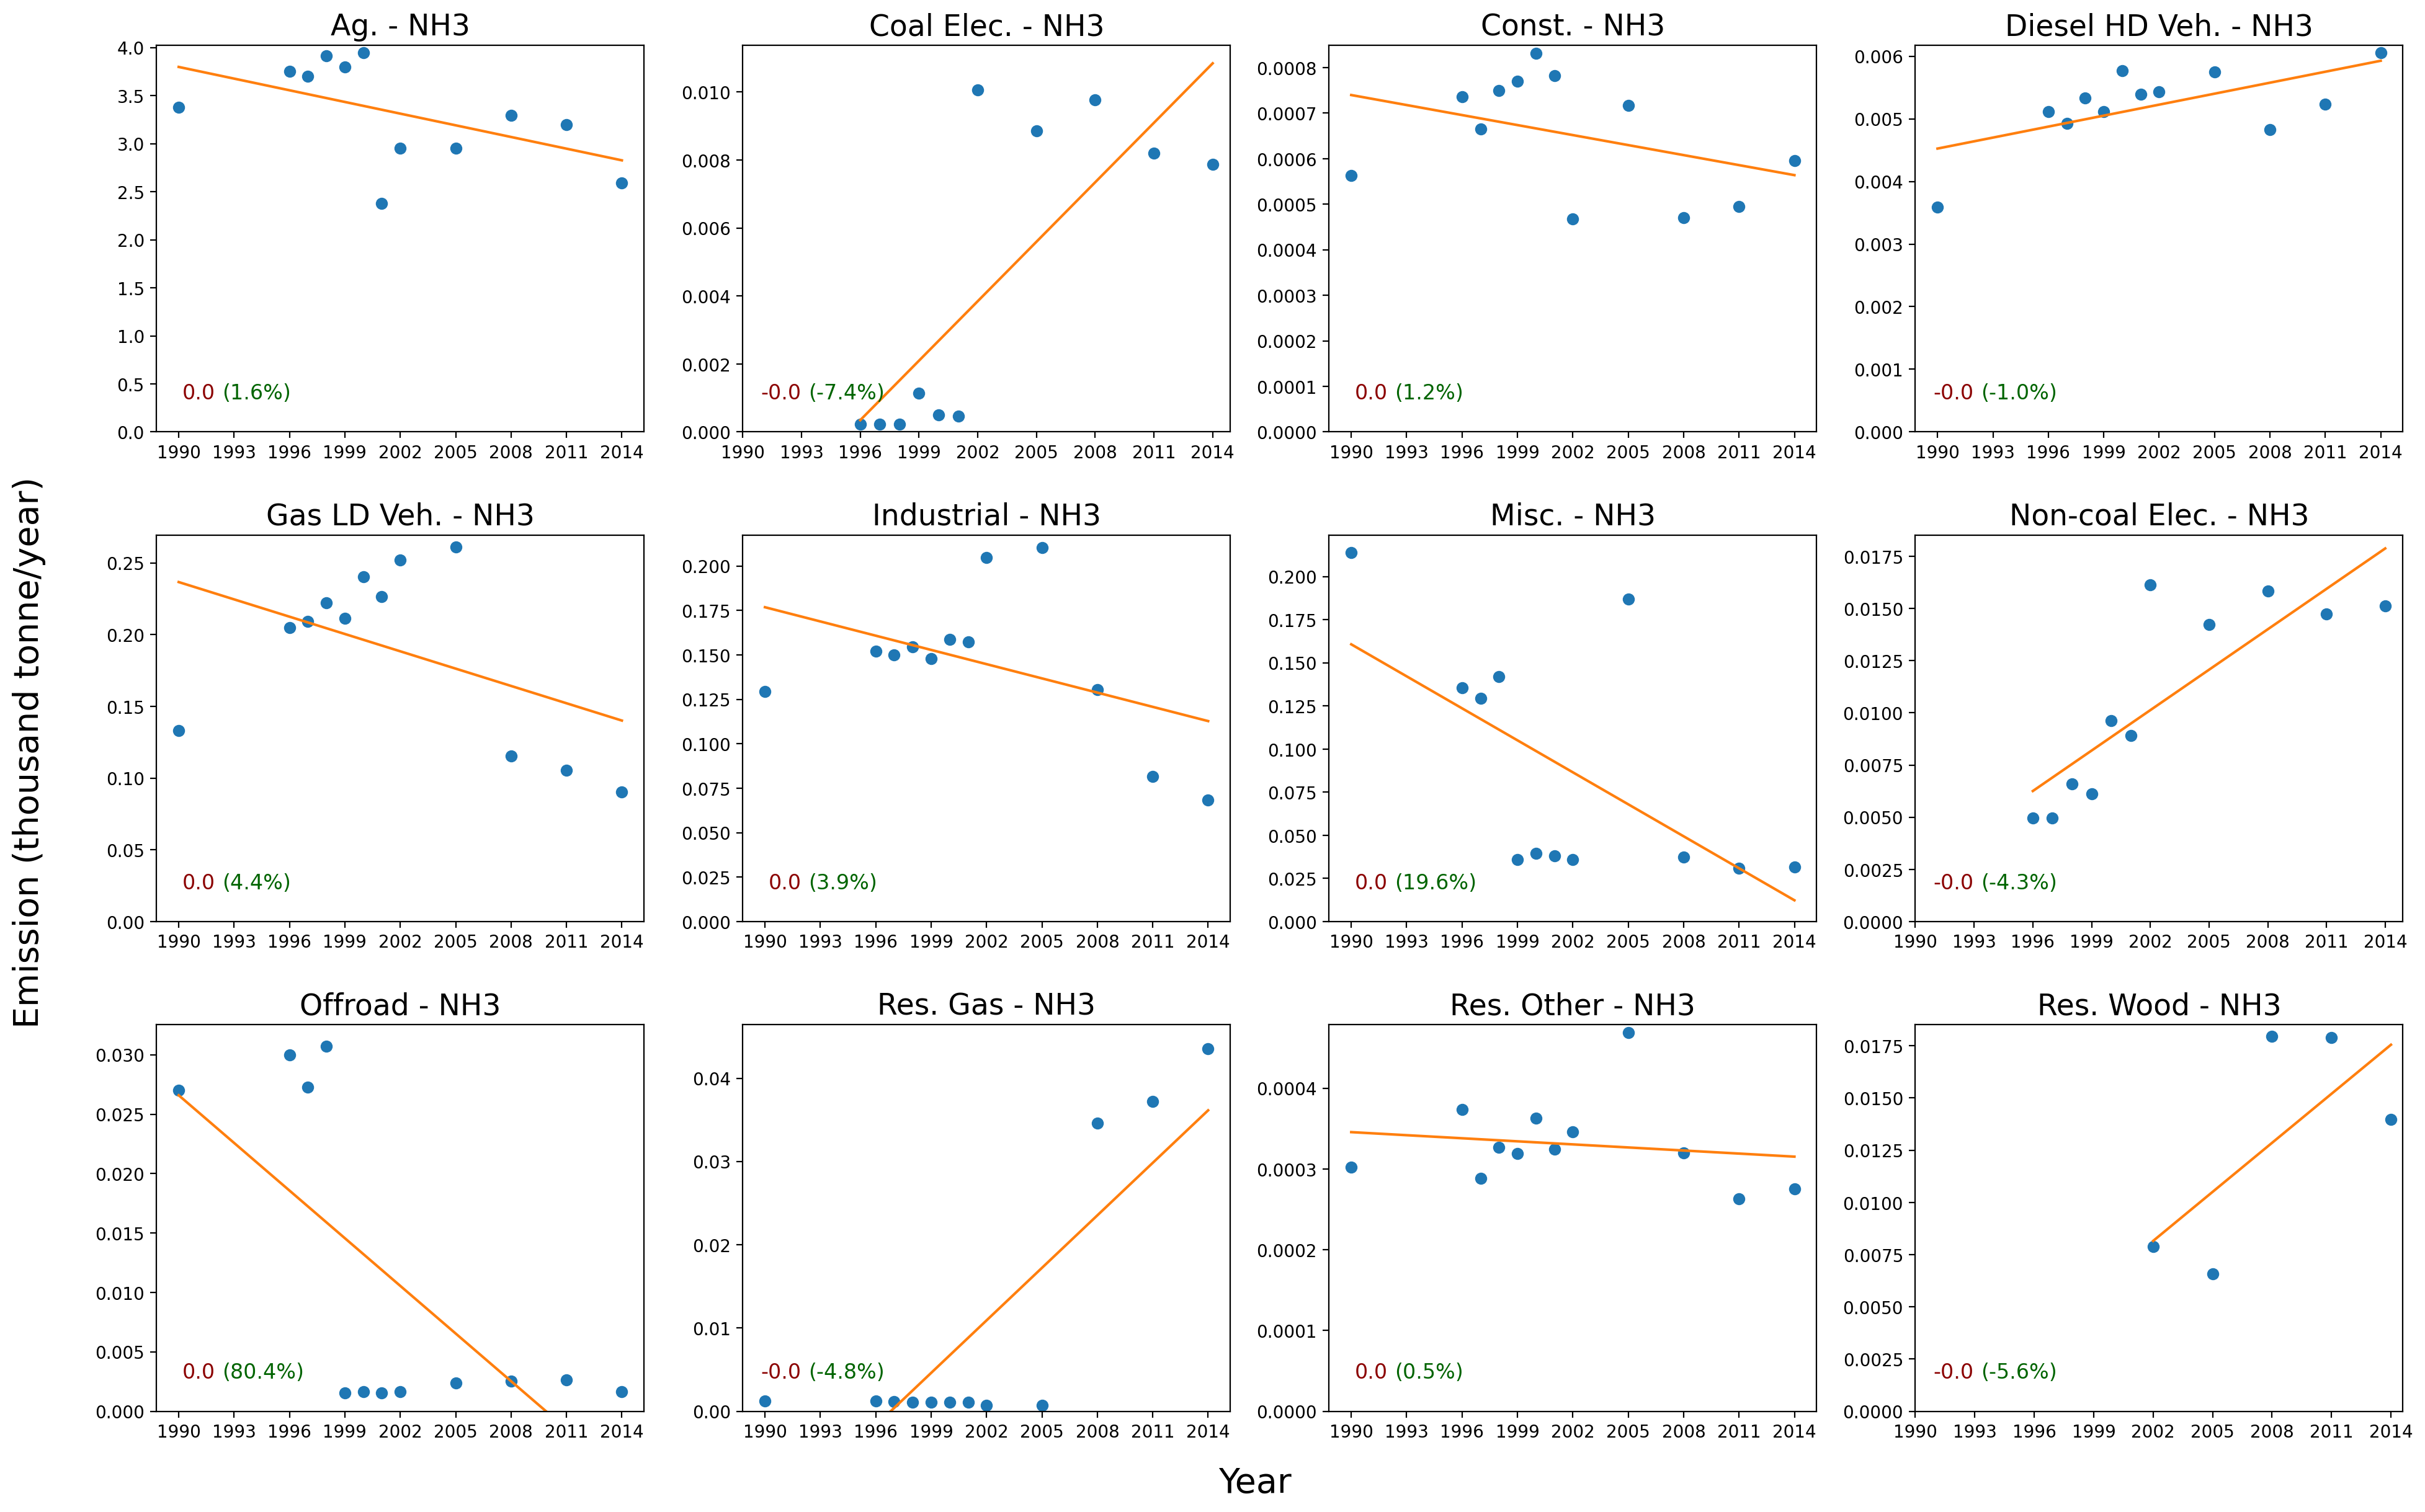

In [86]:
fig = plt.figure(figsize=(19,9.5),dpi = 200)
#fig.suptitle("Disparity",fontsize = 22)
emission_sum_sector_pollution_new_rename_NH3 = emission_sum_sector_pollution_new_rename[emission_sum_sector_pollution_new_rename["pollutant"]=="NH3"].reset_index(drop = True)
slope_list_NH3 = []
for i in range(emission_sum_sector_pollution_new_rename_NH3.shape[0]):
    ax = plt.subplot(3,4, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    test = emission_sum_sector_pollution_new_rename_NH3.iloc[[i]]
    cols_to_keep = [c for c in test.columns[2:14] if test.loc[i,c] >100]
    test = test[cols_to_keep]
    
    emis_list_i = test.loc[i].values.astype(float)/1e6*0.907185
    year_array_i = test.columns.values.astype(int)
    ax.plot(year_array_i,emis_list_i, 'o')
    m, b = np.polyfit(year_array_i,emis_list_i, 1)
    slope_list_NH3.append(-m)
    ax.plot(year_array_i, m*year_array_i+b)
    ax.set_xticks([1990,1993,1996,1999,2002,2005,2008,2011,2014])
    #ax.axis('off')
    # set the title
    ax.set_title(emission_sum_sector_pollution_new_rename_NH3["sector"][i]+" - "+emission_sum_sector_pollution_new_rename_NH3["pollutant"][i],size = 17)
    ax.set_ylim(ymin = 0)# set the aspect
    ax.text(0.12, 0.1, round(-m,1),
     horizontalalignment='right',
     verticalalignment='center',
     transform = ax.transAxes, color = "darkred",size = 12)
    ax.text(0.135, 0.1, "("+str(round(-m/emis_list_i[-1]*100,1))+"%)",
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes, color = "darkgreen",size = 12)

    # set the aspect
    # adjustable datalim ensure that the plots have the same axes size
    #ax.set_aspect('equal', adjustable='datalim')
fig.text(0.5, -0.02, 'Year', ha='center', va='center',size = 20)
fig.text(-0.02, 0.6, 'Emission (thousand tonne/year)', ha='center', va='center', rotation='vertical',size = 20)
plt.tight_layout()
fig.subplots_adjust(top=1.2)


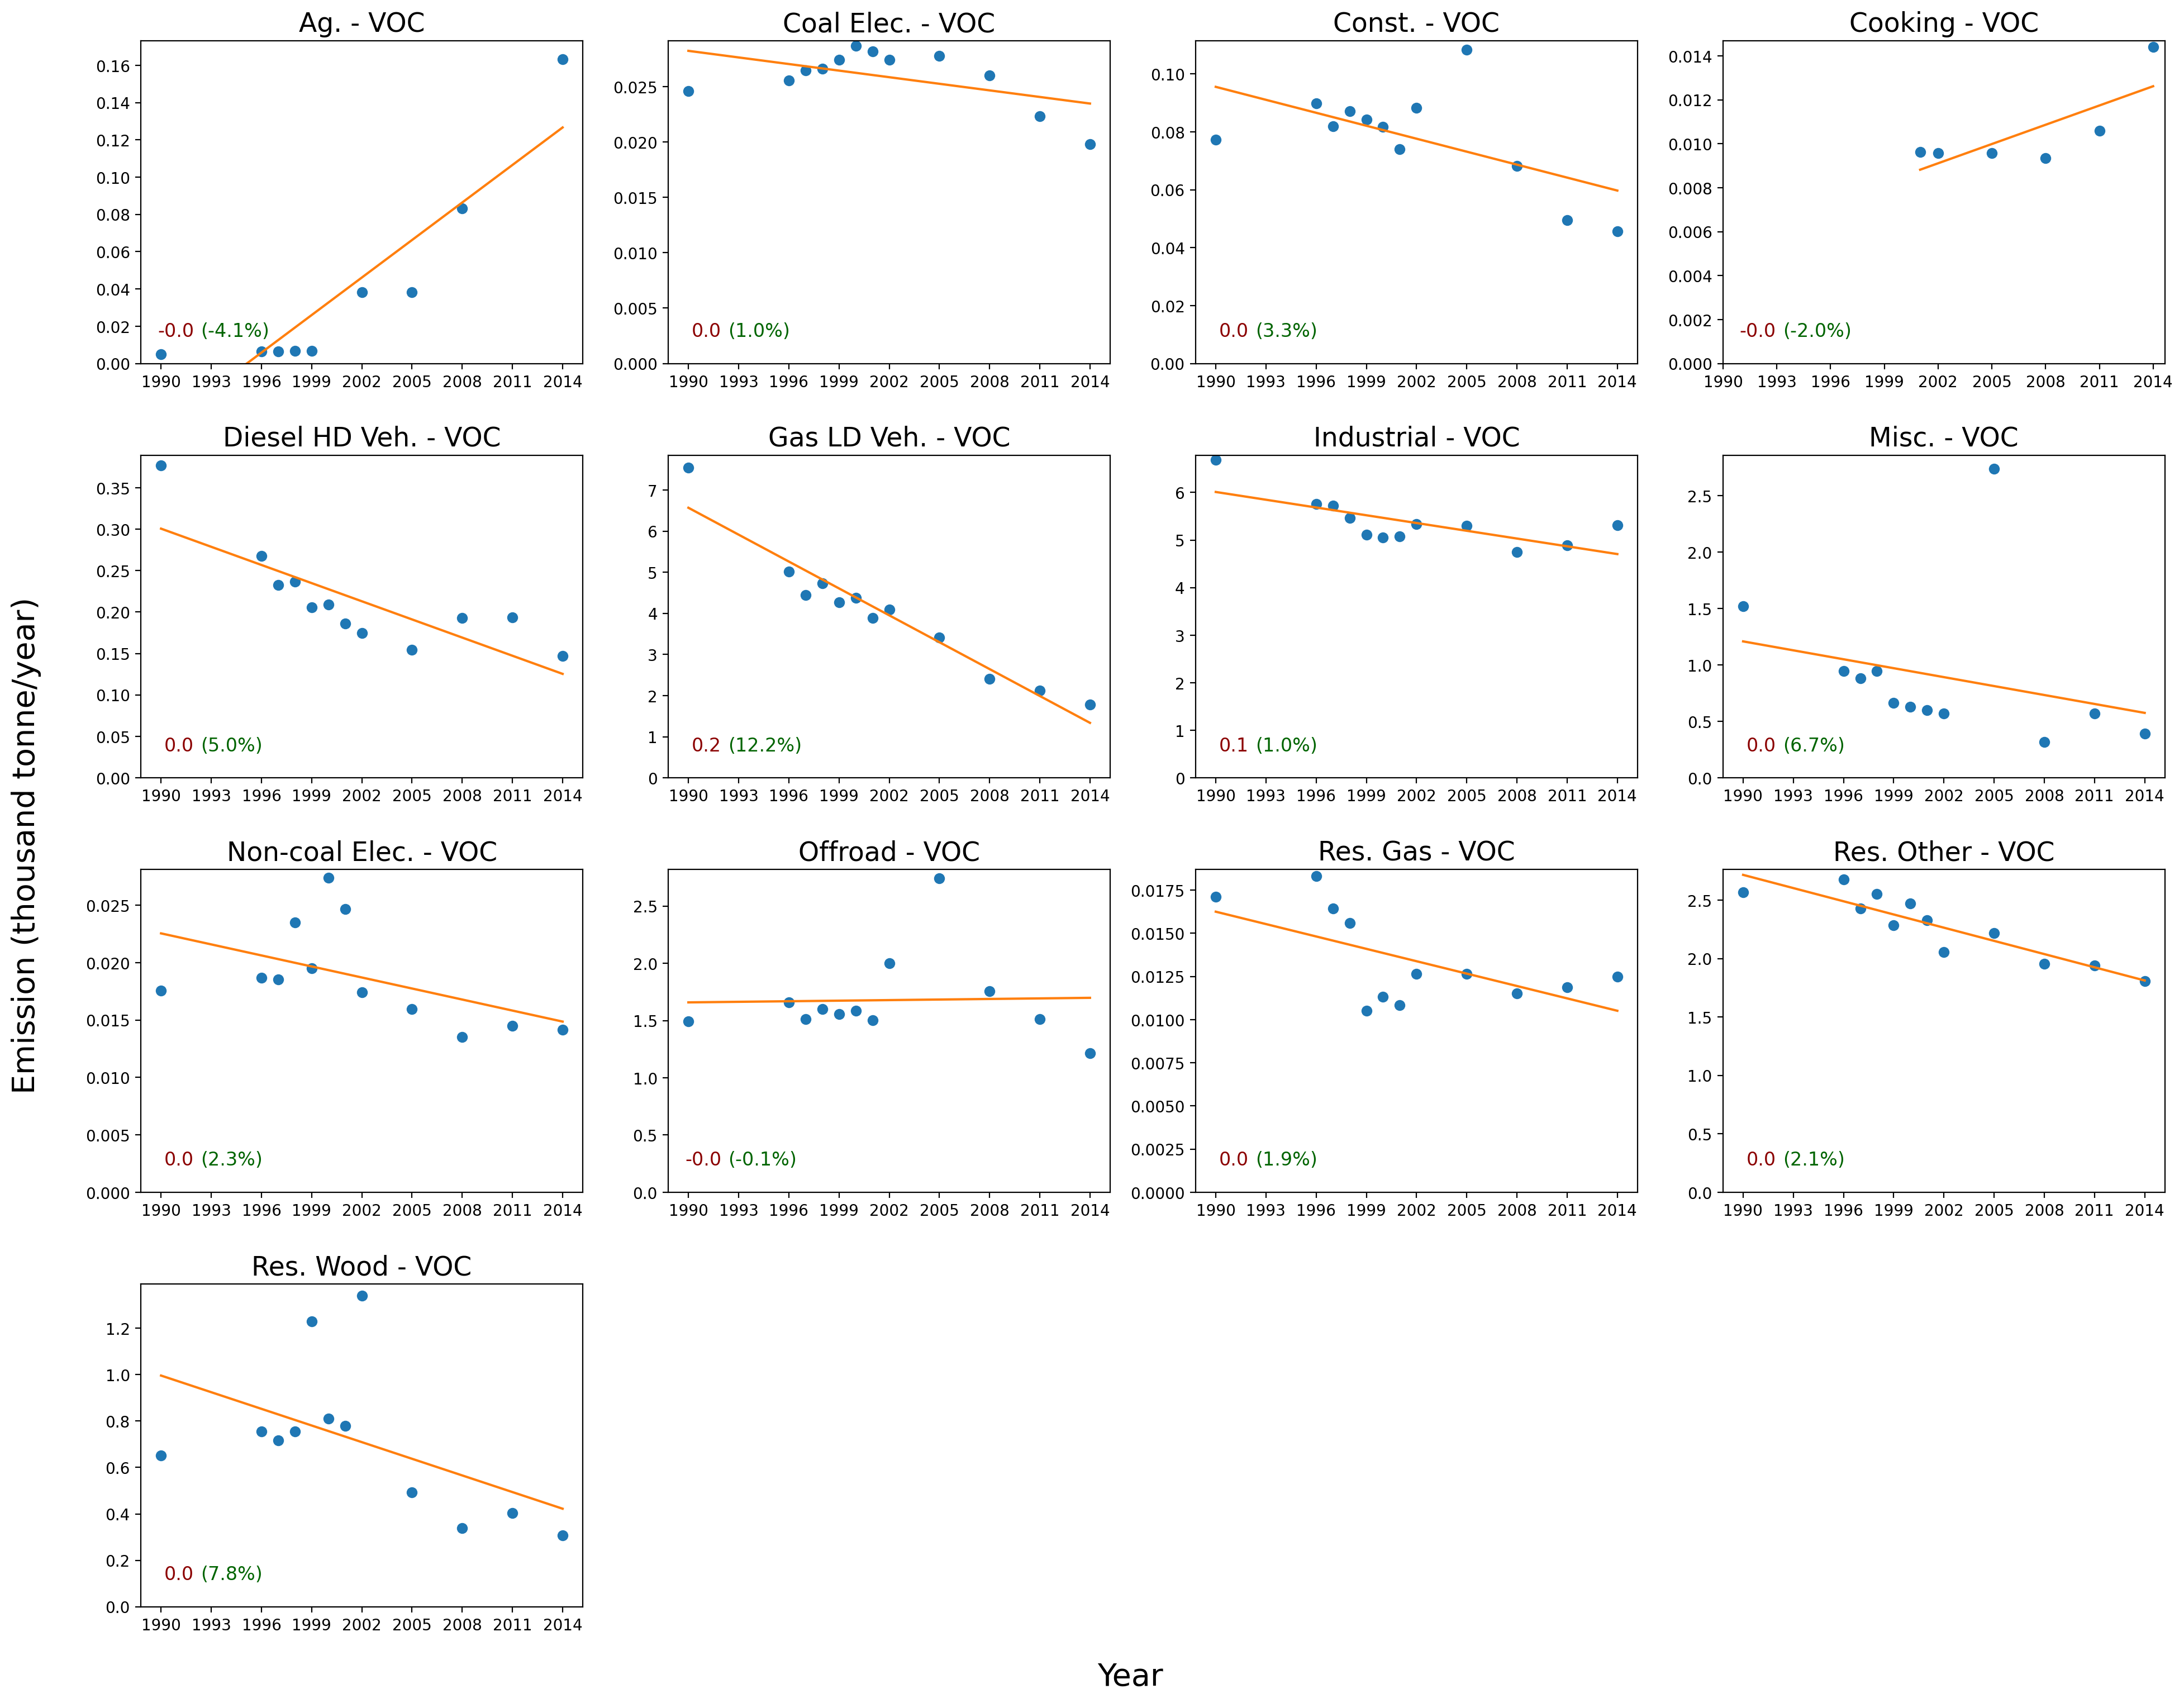

In [87]:
fig = plt.figure(figsize=(19,12),dpi = 200)
#fig.suptitle("Disparity",fontsize = 22)
emission_sum_sector_pollution_new_rename_VOC = emission_sum_sector_pollution_new_rename[emission_sum_sector_pollution_new_rename["pollutant"]=="VOC"].reset_index(drop = True)
slope_list_VOC = []
for i in range(emission_sum_sector_pollution_new_rename_VOC.shape[0]):
    ax = plt.subplot(4,4, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    test = emission_sum_sector_pollution_new_rename_VOC.iloc[[i]]
    cols_to_keep = [c for c in test.columns[2:14] if test.loc[i,c] >100]
    test = test[cols_to_keep]
    
    emis_list_i = test.loc[i].values.astype(float)/1e6*0.907185
    year_array_i = test.columns.values.astype(int)
    ax.plot(year_array_i,emis_list_i, 'o')
    m, b = np.polyfit(year_array_i,emis_list_i, 1)
    slope_list_VOC.append(-m)
    ax.plot(year_array_i, m*year_array_i+b)
    ax.set_xticks([1990,1993,1996,1999,2002,2005,2008,2011,2014])
    #ax.axis('off')
    # set the title
    ax.set_title(emission_sum_sector_pollution_new_rename_VOC["sector"][i]+" - "+emission_sum_sector_pollution_new_rename_VOC["pollutant"][i],size = 17)
    ax.set_ylim(ymin = 0)# set the aspect
    ax.text(0.12, 0.1, round(-m,1),
     horizontalalignment='right',
     verticalalignment='center',
     transform = ax.transAxes, color = "darkred",size = 12)
    ax.text(0.135, 0.1, "("+str(round(-m/emis_list_i[-1]*100,1))+"%)",
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes, color = "darkgreen",size = 12)

    # set the aspect
    # adjustable datalim ensure that the plots have the same axes size
    #ax.set_aspect('equal', adjustable='datalim')
fig.text(0.5, -0.02, 'Year', ha='center', va='center',size = 20)
fig.text(-0.02, 0.6, 'Emission (thousand tonne/year)', ha='center', va='center', rotation='vertical',size = 20)
plt.tight_layout()
fig.subplots_adjust(top=1.2)


In [126]:
slope_list_pollutant = slope_list_PM+slope_list_NOx+slope_list_SOx+slope_list_NH3+slope_list_VOC

In [127]:
emission_sum_sector_by_pollutant = pd.concat([emission_sum_sector_pollution_new_rename_PM,emission_sum_sector_pollution_new_rename_NO,
          emission_sum_sector_pollution_new_rename_SO,emission_sum_sector_pollution_new_rename_NH3,
          emission_sum_sector_pollution_new_rename_VOC])

In [163]:
emission_sum_sector_by_pollutant

sector pollutant          1990          1996          1997  \
0              Ag.     PM2_5  1.031029e+06  9.534521e+05  9.441481e+05   
1       Coal Elec.     PM2_5  9.660429e+04  1.333440e+05  1.354692e+05   
2           Const.     PM2_5  9.255547e+05  4.351643e+05  4.104508e+05   
3          Cooking     PM2_5  0.000000e+00  0.000000e+00  0.000000e+00   
4   Diesel HD Veh.     PM2_5  2.429241e+05  1.663075e+05  1.437890e+05   
..             ...       ...           ...           ...           ...   
8   Non-coal Elec.       VOC  1.935294e+04  2.058078e+04  2.044252e+04   
9          Offroad       VOC  1.644056e+06  1.829886e+06  1.669970e+06   
10        Res. Gas       VOC  1.886708e+04  2.017679e+04  1.813425e+04   
11      Res. Other       VOC  2.832893e+06  2.952911e+06  2.675246e+06   
12       Res. Wood       VOC  7.175166e+05  8.332692e+05  7.905993e+05   

            1998          1999          2000          2001          2002  \
0   9.611541e+05  9.410016e+05  9.771360e+05  9.702377e+05  5.568572e+05   
1   1.032779e+05  5.435930e+05  5.074862e+05  5.002895e+05  4.721288e+05   
2   4.423694e+05  4.292799e+05  4.670602e+05  4.447588e+05  2.702266e+05   
3   0.000000e+00  2.881890e+02  2.965450e+02  7.285416e+04  6.925788e+04   
4   1.387742e+05  1.192447e+05  1.189625e+05  1.003257e+05  1.010402e+05   
..           ...           ...           ...           ...           ...   
8   2.593923e+04  2.154140e+04  3.023109e+04  2.718349e+04  1.923389e+04   
9   1.763679e+06  1.715834e+06  1.746007e+06  1.656468e+06  2.207468e+06   
10  1.718334e+04  1.158564e+04  1.248241e+04  1.194424e+04  1.394374e+04   
11  2.814926e+06  2.517504e+06  2.724348e+06  2.565150e+06  2.267548e+06   
12  8.332692e+05  1.355238e+06  8.947821e+05  8.589764e+05  1.476816e+06   

            2005          2008          2011          2014          2017  \
0   5.568572e+05  9.303344e+05  8.959241e+05  9.878165e+05  7.935982e+05   
1   4.791113e+05  2.752667e+05  1.703637e+05  1.420217e+05  7.413945e+04   
2   2.886142e+05  2.727262e+05  2.061069e+05  1.979830e+05  1.691241e+05   
3   6.925788e+04  7.120077e+04  7.736349e+04  8.932896e+04  1.104880e+05   
4   8.730567e+04  1.602561e+05  1.208120e+05  1.790274e+05  1.096314e+05   
..           ...           ...           ...           ...           ...   
8   1.757435e+04  1.493059e+04  1.597877e+04  1.563759e+04  1.518337e+04   
9   3.023361e+06  1.934829e+06  1.669670e+06  1.339412e+06  8.324184e+05   
10  1.394374e+04  1.270429e+04  1.308978e+04  1.377358e+04  1.211642e+04   
11  2.445966e+06  2.155577e+06  2.138808e+06  1.994464e+06  1.944770e+06   
12  5.434700e+05  3.743766e+05  4.437285e+05  3.398772e+05  3.331737e+05   

    reduction_slope  
0          0.005076  
1         -0.002024  
2          0.024344  
3         -0.004620  
4          0.001991  
..              ...  
8          0.000353  
9         -0.001826  
10         0.000264  
11         0.041525  
12         0.026368  

[61 rows x 16 columns]

In [128]:
emission_sum_sector_by_pollutant["reduction_slope"] = slope_list_pollutant

In [165]:
emission_sum_sector_by_pollutant["change_percentage_14"] = emission_sum_sector_by_pollutant["reduction_slope"]/emission_sum_sector_by_pollutant["2014"]*1e6*100

In [167]:
emission_sum_sector_by_pollutant_summary = emission_sum_sector_by_pollutant.groupby(["pollutant"]).sum().sort_values(by = "reduction_slope").reset_index()

In [169]:
emission_sum_sector_by_pollutant_summary["change_percentage_14_pollutant"]= emission_sum_sector_by_pollutant_summary["reduction_slope"]/emission_sum_sector_by_pollutant_summary["2014"]*1e6*100

## Plotting summarized emission-reduction rate by sector and by pollutant

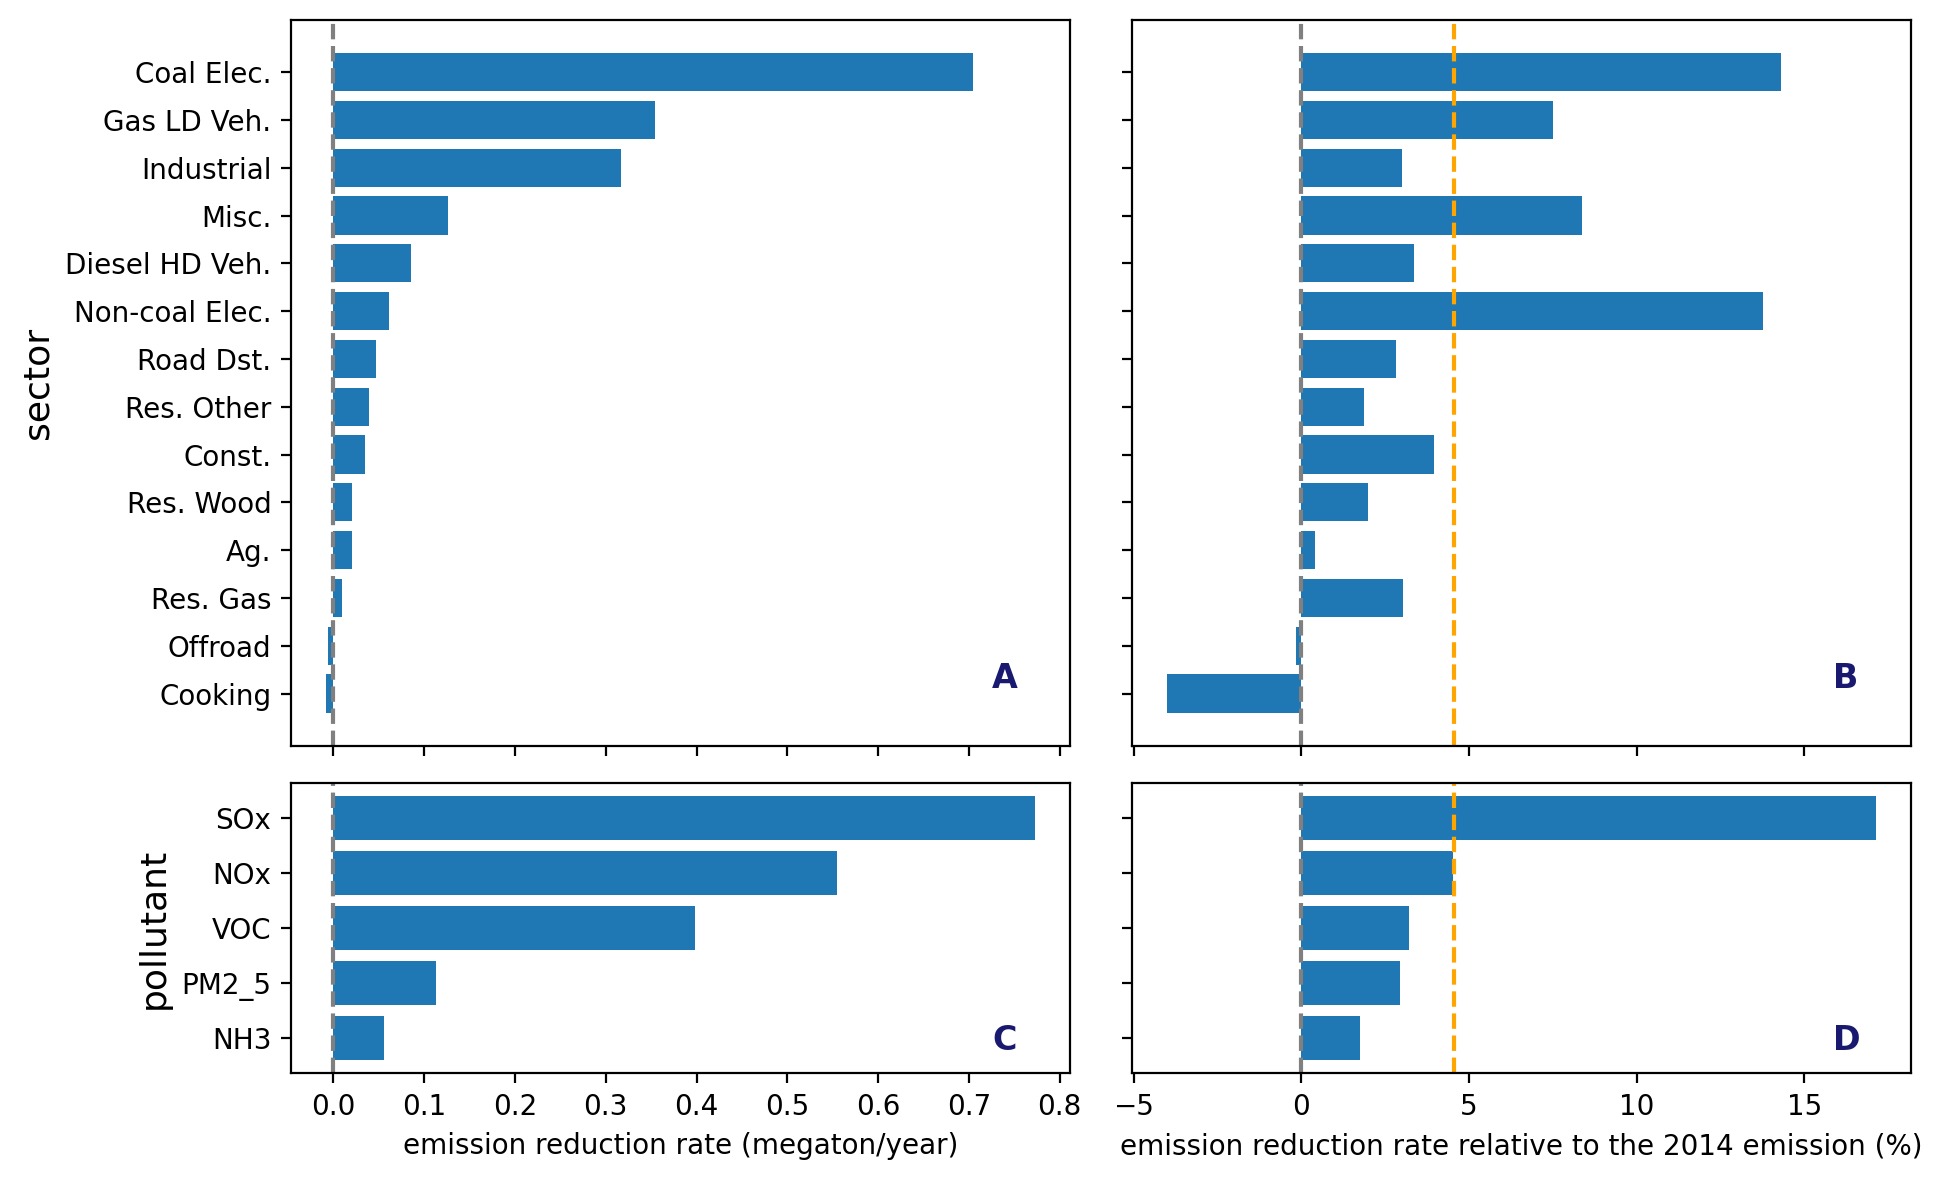

In [222]:
fig, ax = plt.subplots(nrows = 2, ncols = 2,figsize = (10,6), dpi = 200, gridspec_kw={'height_ratios': [2.5,1]},sharey = "row",sharex = "col")

ax[0,0].barh(emission_sum_sector_new_sorted.sector, emission_sum_sector_new_sorted.reduction_slope, align='center')
ax[0,0].axvline(x = 0, color = 'grey', linestyle = "--")
#ax[0,0].set_xlabel("emission reduction rate (megaton/year)")
ax[0,0].set_ylabel("sector",size = 13)

ax[0,1].barh(emission_sum_sector_new_sorted.sector, emission_sum_sector_new_sorted.change_percentage_14, align='center')
ax[0,1].axvline(x = 0, color = 'grey', linestyle = "--")

ax[0,1].axvline(x = emission_sum_sector_new_rename["reduction_slope"].sum()/emission_sum_sector_new_rename["2014"].sum()*100*1e6, color = 'orange', linestyle = "--")
#ax[0,1].set_xlabel("emission reduction rate relative to the 2014 emission (%)")

ax[1,0].barh(emission_sum_sector_by_pollutant_summary.pollutant, emission_sum_sector_by_pollutant_summary.reduction_slope, align='center')
ax[1,0].axvline(x = 0, color = 'grey', linestyle = "--")
ax[1,0].set_xlabel("emission reduction rate (megaton/year)")
ax[1,0].set_ylabel("pollutant",size = 13)


ax[1,1].barh(emission_sum_sector_by_pollutant_summary.pollutant, emission_sum_sector_by_pollutant_summary.change_percentage_14_pollutant, align='center')
ax[1,1].axvline(x = 0, color = 'grey', linestyle = "--")

ax[1,1].axvline(x = emission_sum_sector_new_rename["reduction_slope"].sum()/emission_sum_sector_new_rename["2014"].sum()*100*1e6, color = 'orange', linestyle = "--")
ax[1,1].set_xlabel("emission reduction rate relative to the 2014 emission (%)")
ax[0,0].text(0.9,0.08, 'A', fontsize = 12,horizontalalignment='left',color = "midnightblue",weight='bold', transform=ax[0,0].transAxes)
ax[0,1].text(0.9,0.08, 'B', fontsize = 12,horizontalalignment='left',color = "midnightblue",weight='bold', transform=ax[0,1].transAxes)
ax[1,0].text(0.9,0.08, 'C', fontsize = 12,horizontalalignment='left',color = "midnightblue",weight='bold', transform=ax[1,0].transAxes)
ax[1,1].text(0.9,0.08, 'D', fontsize = 12,horizontalalignment='left',color = "midnightblue",weight='bold', transform=ax[1,1].transAxes)

plt.tight_layout(h_pad =1,w_pad = 0)
plt.show()

In [144]:
emission_sum_sector_by_pollutant.to_csv("../emission_sum_sector_by_pollutant.csv")

# Calculate emission reduction rate from 2008 to 2014

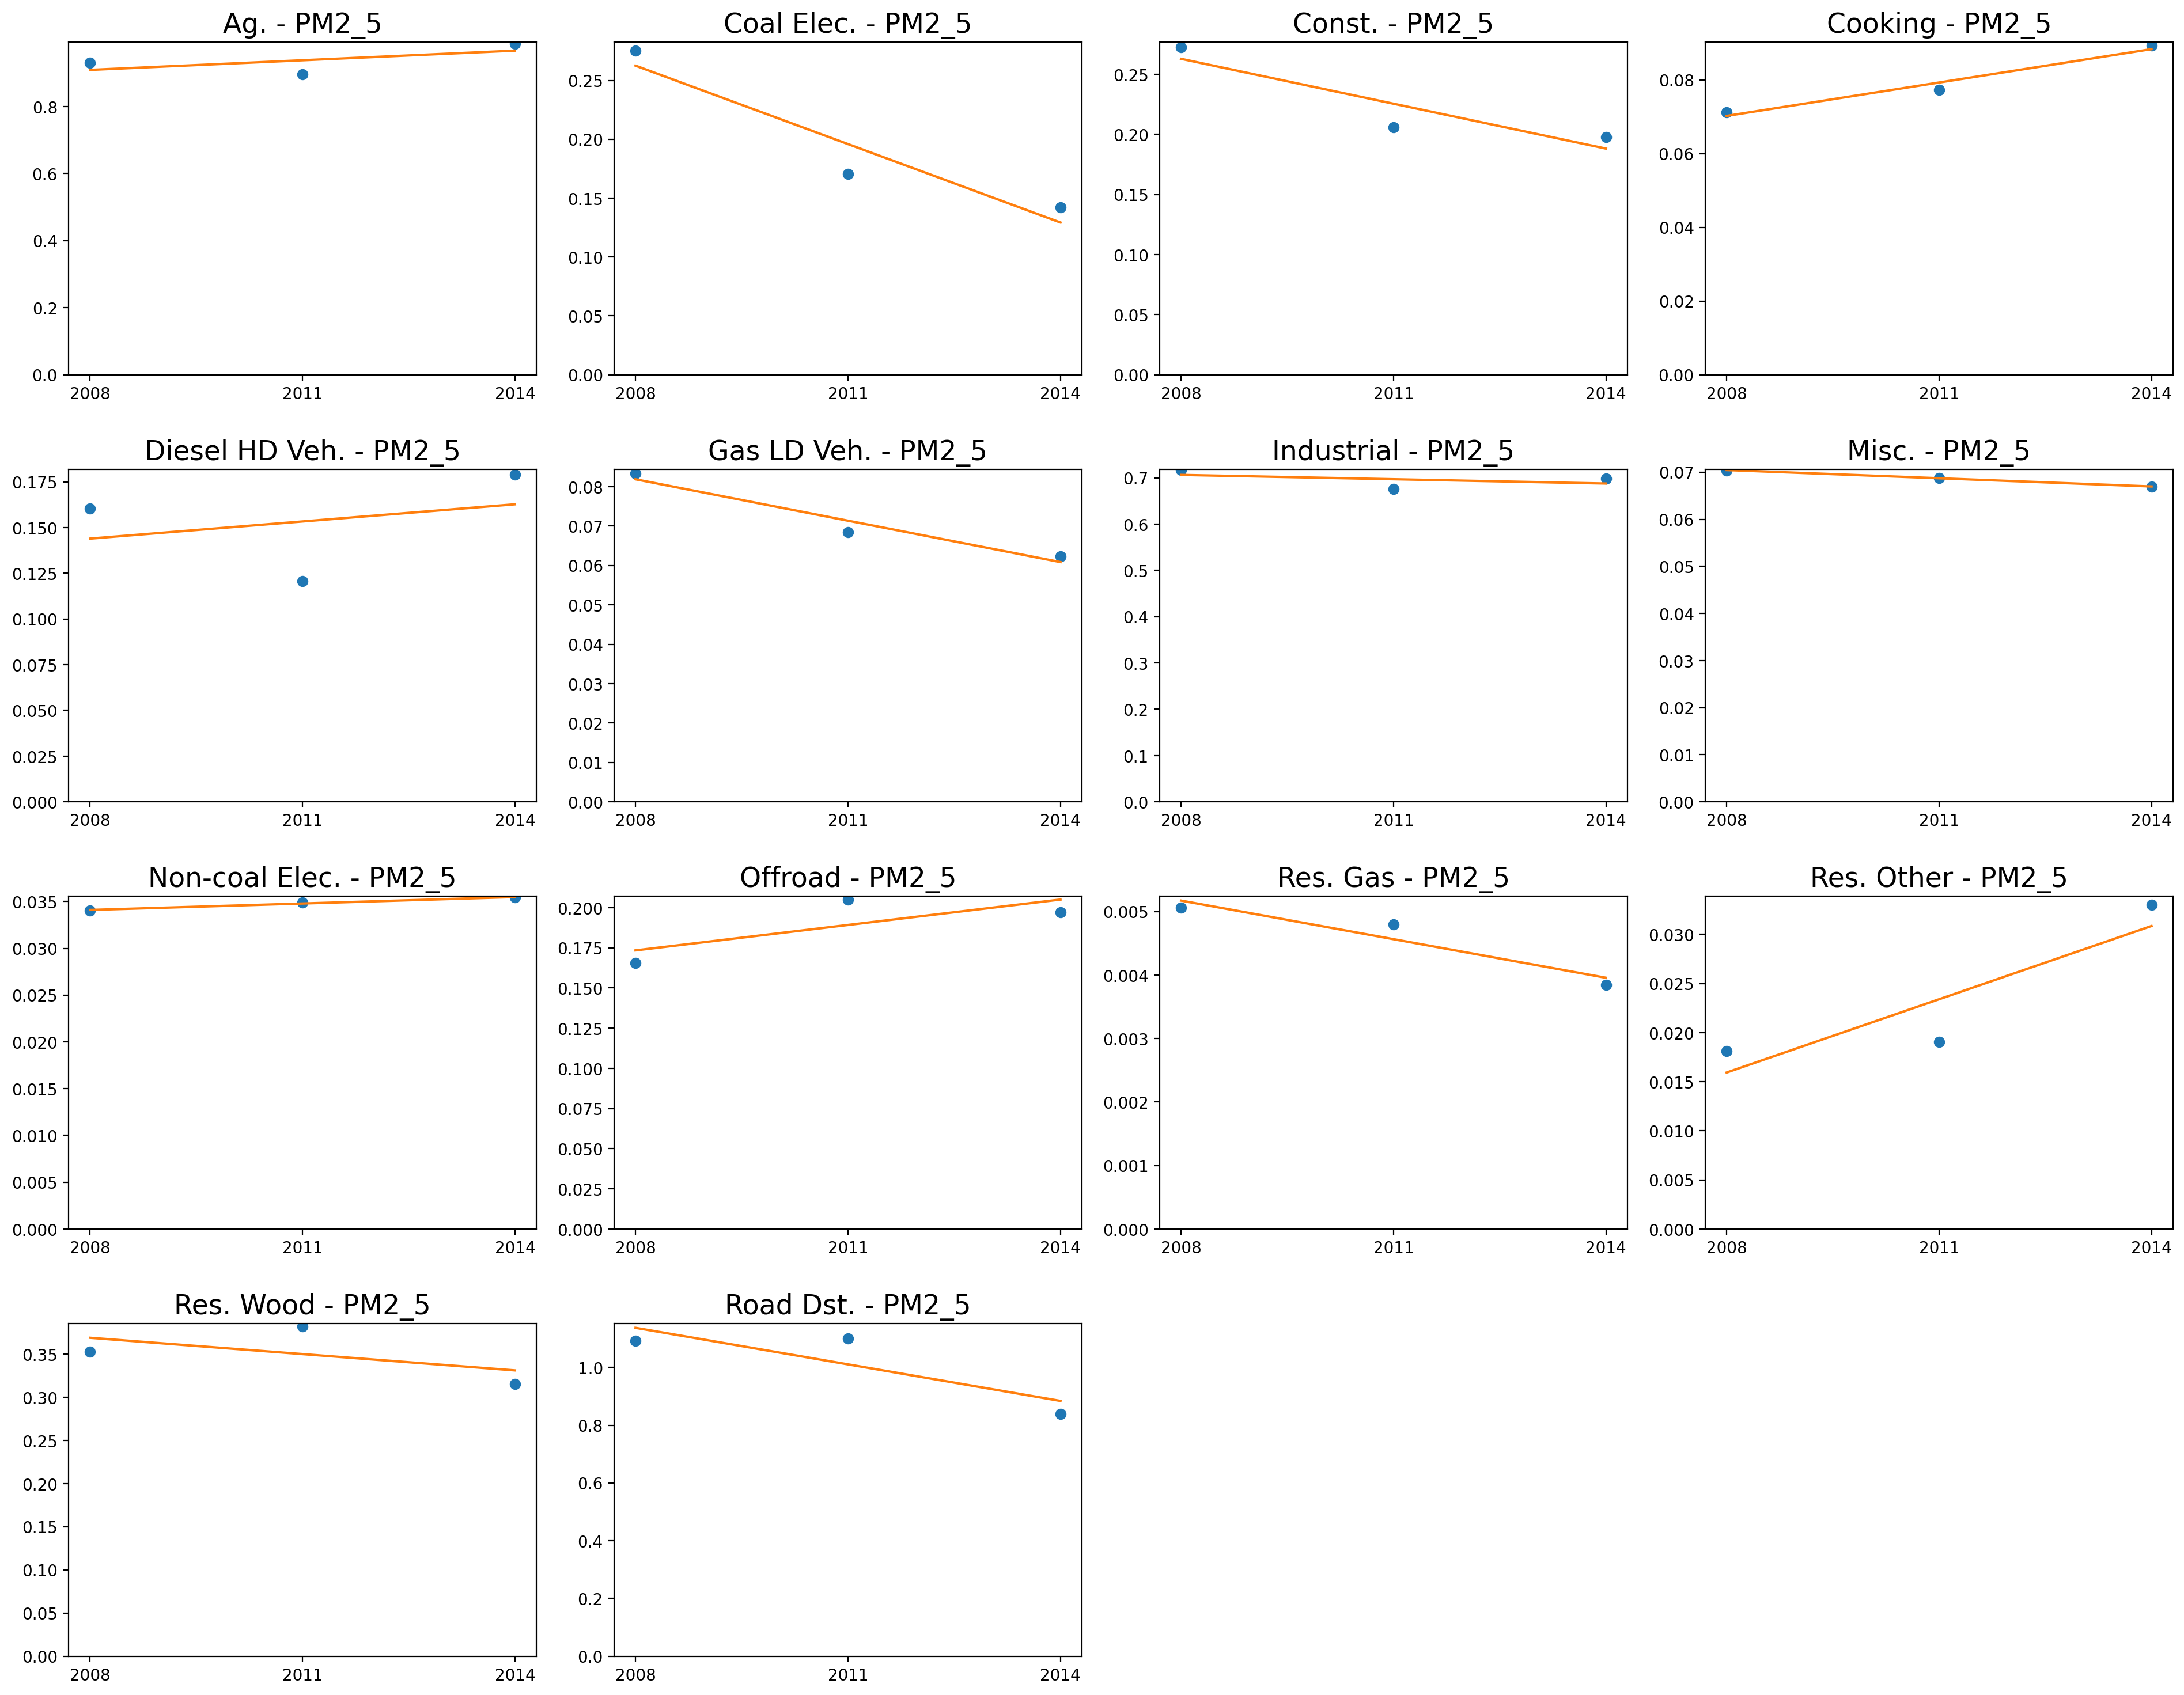

In [135]:
fig = plt.figure(figsize=(19,12),dpi = 200)
#fig.suptitle("Disparity",fontsize = 22)
emission_sum_sector_pollution_new_rename_PM = emission_sum_sector_by_pollutant[emission_sum_sector_by_pollutant["pollutant"]=="PM2_5"].reset_index(drop = True)
slope_list_PM_0814 = []
for i in range(emission_sum_sector_pollution_new_rename_PM.shape[0]):
    ax = plt.subplot(4,4, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    test = emission_sum_sector_pollution_new_rename_PM.iloc[[i]]
    cols_to_keep = [c for c in test.columns[11:14] if test.loc[i,c] >100]
    test = test[cols_to_keep]
    
    emis_list_i = test.loc[i].values.astype(float)/1e6
    year_array_i = test.columns.values.astype(int)
    ax.plot(year_array_i,emis_list_i, 'o')
    m, b = np.polyfit(year_array_i,emis_list_i, 1)
    slope_list_PM_0814.append(-m)
    ax.plot(year_array_i, m*year_array_i+b)
    ax.set_xticks([2008,2011,2014])
    #ax.axis('off')
    # set the title
    ax.set_title(emission_sum_sector_pollution_new_rename_PM["sector"][i]+" - "+emission_sum_sector_pollution_new_rename_PM["pollutant"][i],size = 17)
    ax.set_ylim(ymin = 0)

    # set the aspect
    # adjustable datalim ensure that the plots have the same axes size
    #ax.set_aspect('equal', adjustable='datalim')
plt.tight_layout()
fig.subplots_adjust(top=1.2)


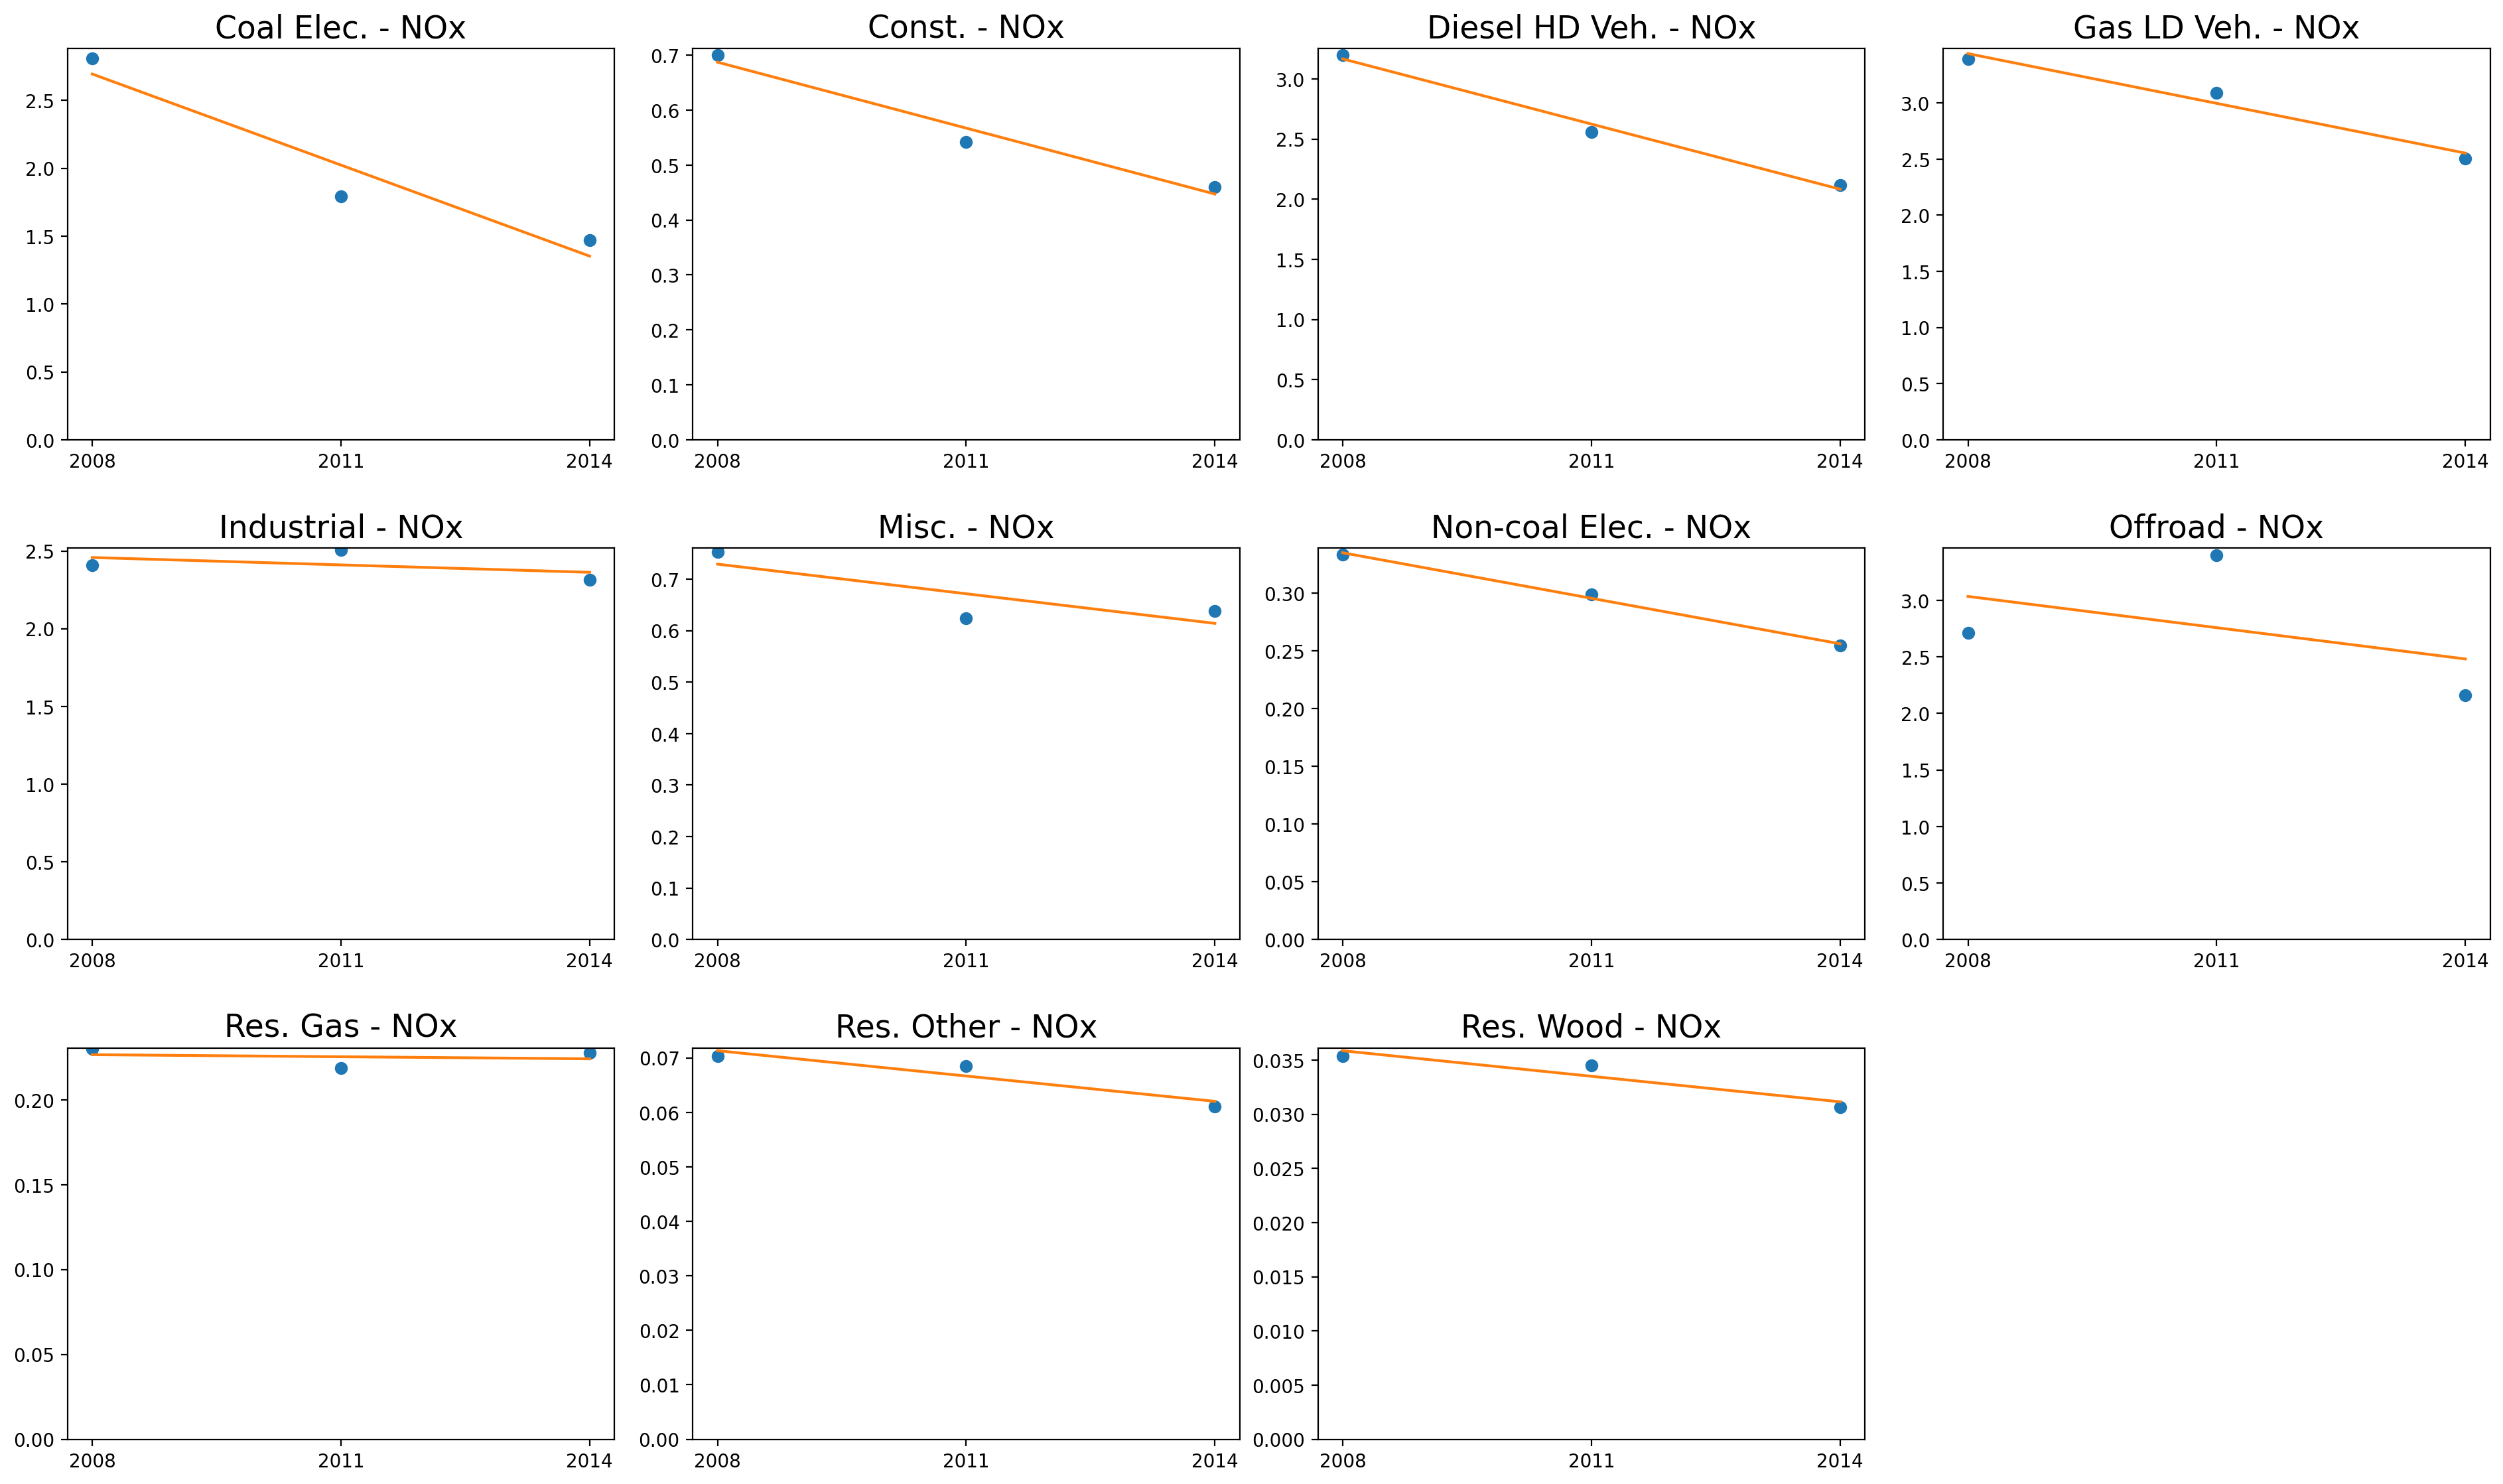

In [137]:
fig = plt.figure(figsize=(19,12),dpi = 200)
#fig.suptitle("Disparity",fontsize = 22)
emission_sum_sector_pollution_new_rename_NO = emission_sum_sector_by_pollutant[emission_sum_sector_by_pollutant["pollutant"]=="NOx"].reset_index(drop = True)
slope_list_NOx_0814 = []
for i in range(emission_sum_sector_pollution_new_rename_NO.shape[0]):
    ax = plt.subplot(4,4, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    test = emission_sum_sector_pollution_new_rename_NO.iloc[[i]]
    cols_to_keep = [c for c in test.columns[11:14] if test.loc[i,c] >100]
    test = test[cols_to_keep]
    
    emis_list_i = test.loc[i].values.astype(float)/1e6
    year_array_i = test.columns.values.astype(int)
    ax.plot(year_array_i,emis_list_i, 'o')
    m, b = np.polyfit(year_array_i,emis_list_i, 1)
    slope_list_NOx_0814.append(-m)
    ax.plot(year_array_i, m*year_array_i+b)
    ax.set_xticks([2008,2011,2014])
    #ax.axis('off')
    # set the title
    ax.set_title(emission_sum_sector_pollution_new_rename_NO["sector"][i]+" - "+emission_sum_sector_pollution_new_rename_NO["pollutant"][i],size = 17)
    ax.set_ylim(ymin = 0)
    # set the aspect
    # adjustable datalim ensure that the plots have the same axes size
    #ax.set_aspect('equal', adjustable='datalim')
plt.tight_layout()
fig.subplots_adjust(top=1.2)


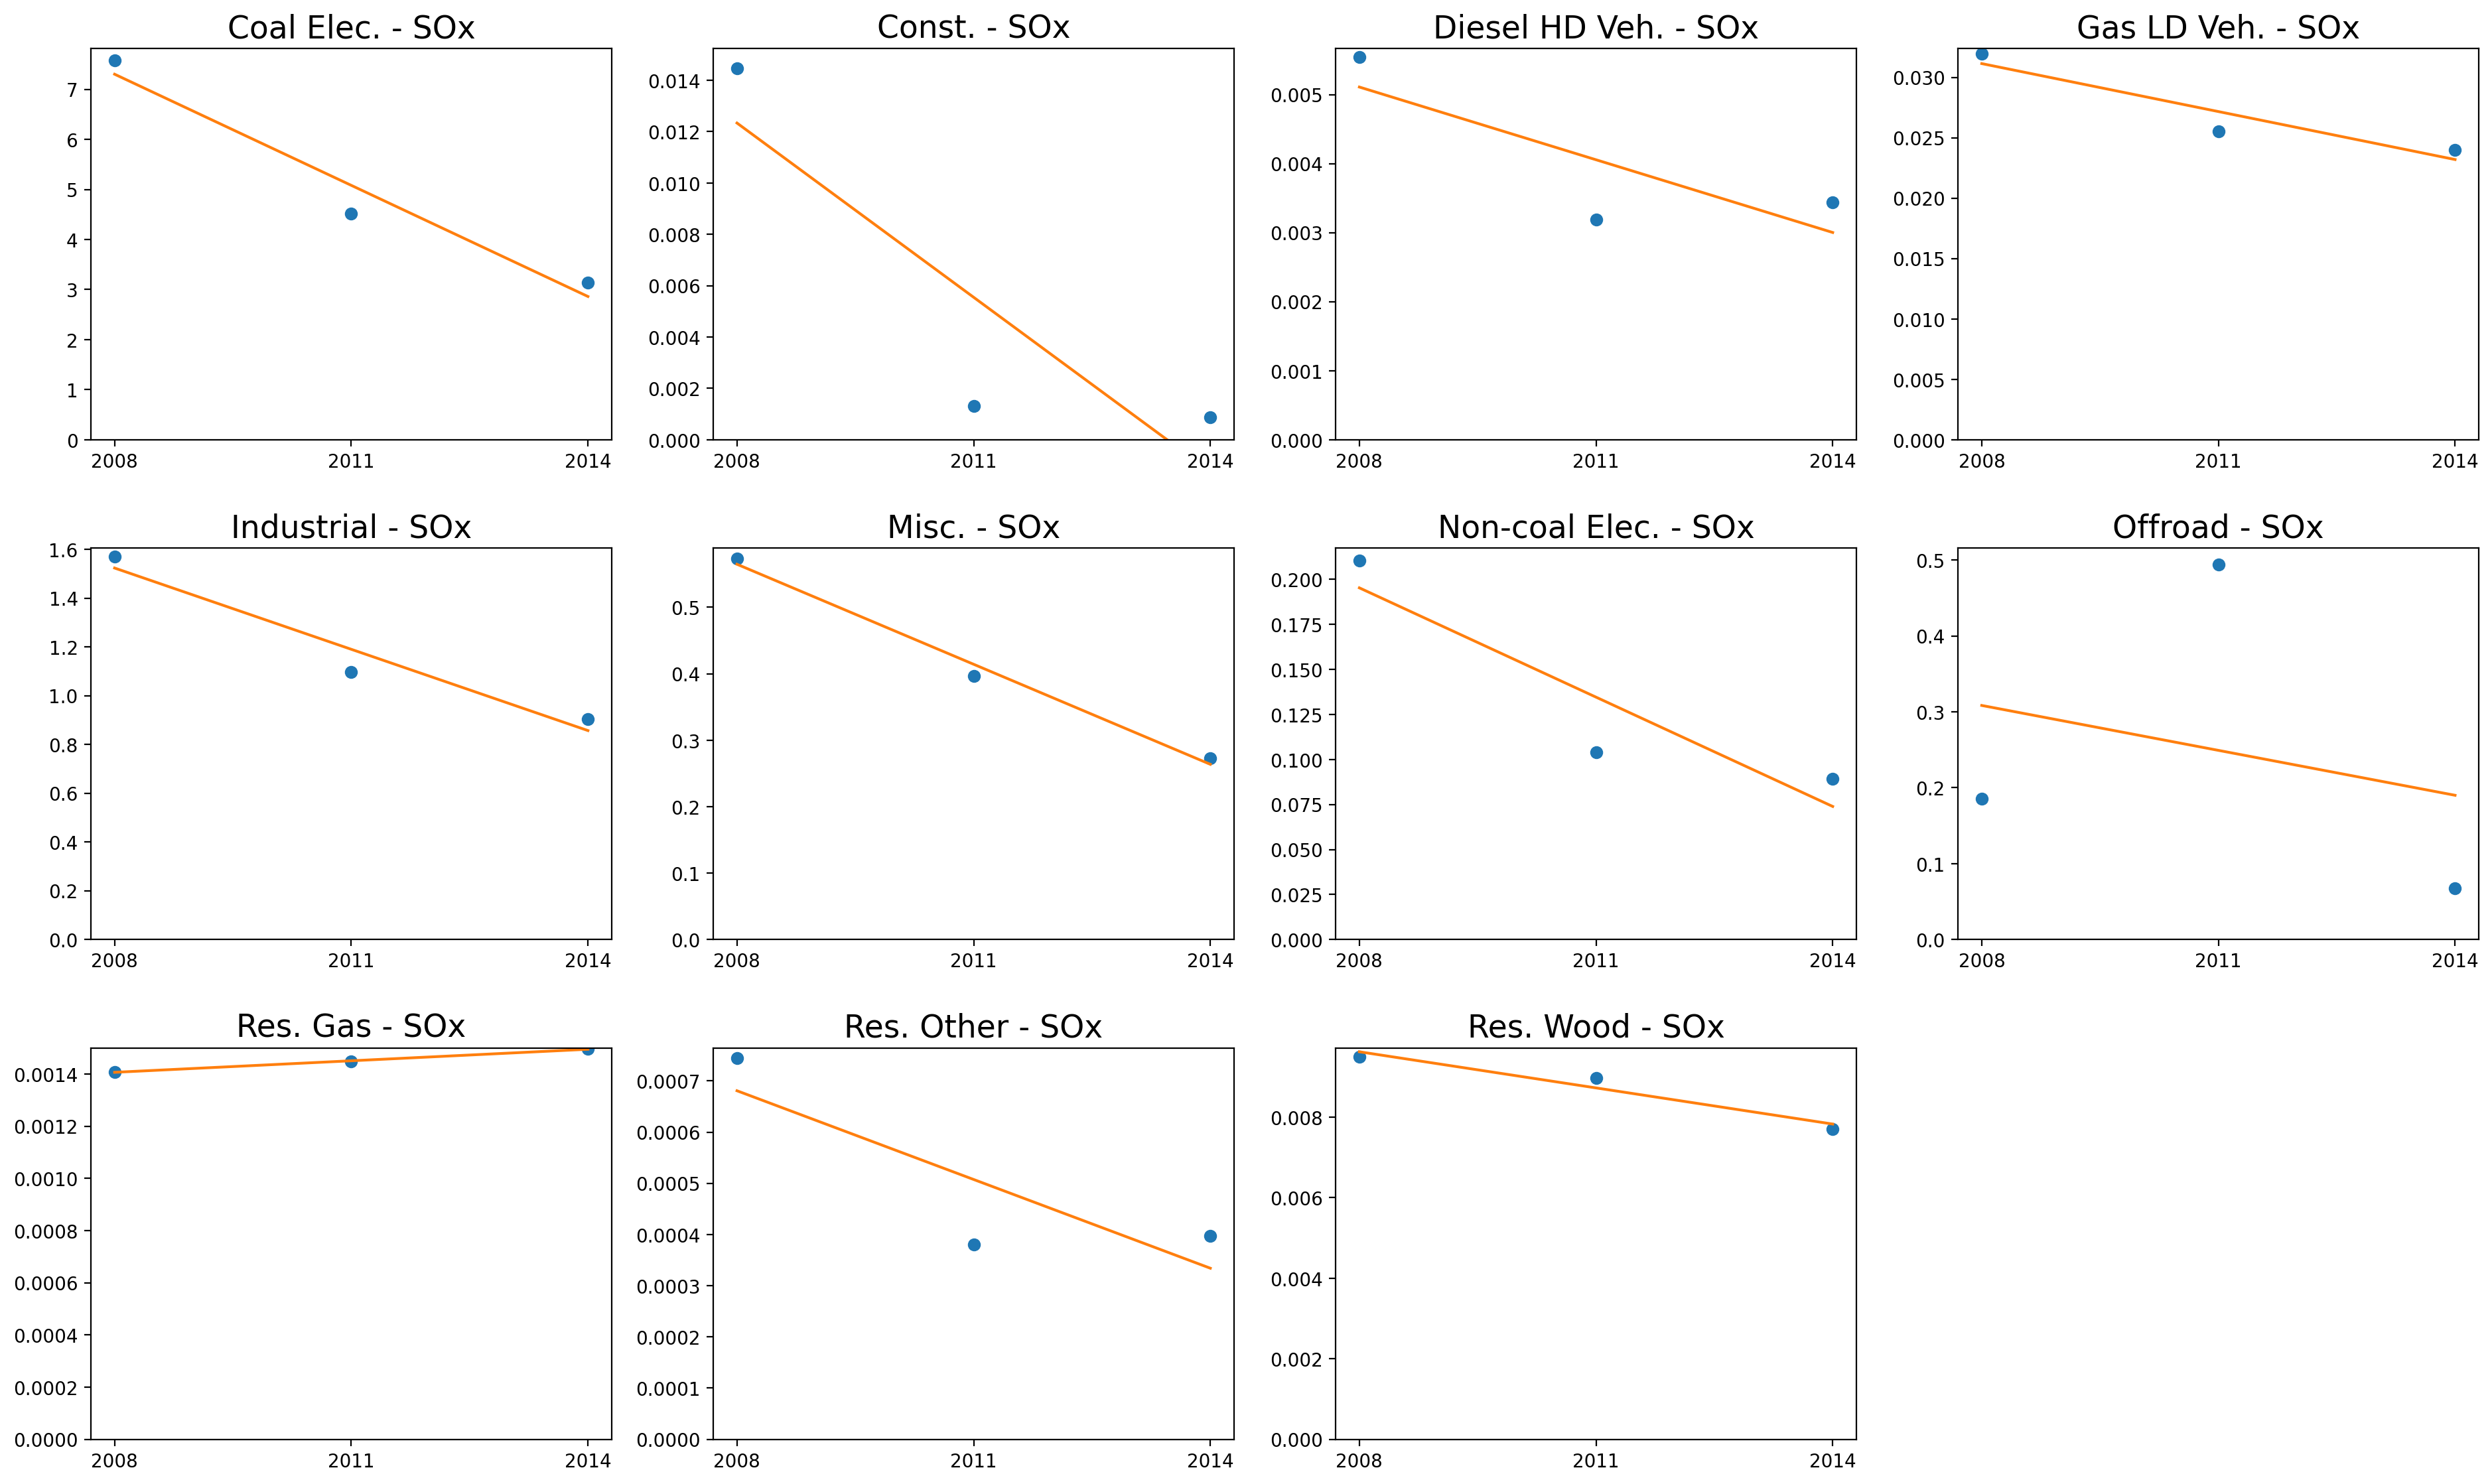

In [138]:
fig = plt.figure(figsize=(19,12),dpi = 200)
#fig.suptitle("Disparity",fontsize = 22)
emission_sum_sector_pollution_new_rename_SO = emission_sum_sector_by_pollutant[emission_sum_sector_by_pollutant["pollutant"]=="SOx"].reset_index(drop = True)
slope_list_SOx_0814 = []
for i in range(emission_sum_sector_pollution_new_rename_SO.shape[0]):
    ax = plt.subplot(4,4, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    test = emission_sum_sector_pollution_new_rename_SO.iloc[[i]]
    cols_to_keep = [c for c in test.columns[11:14] if test.loc[i,c] >100.0]
    test = test[cols_to_keep]
    
    emis_list_i = test.loc[i].values.astype(float)/1e6
    year_array_i = test.columns.values.astype(int)
    ax.plot(year_array_i,emis_list_i, 'o')
    m, b = np.polyfit(year_array_i,emis_list_i, 1)
    slope_list_SOx_0814.append(-m)
    ax.plot(year_array_i, m*year_array_i+b)
    ax.set_xticks([2008,2011,2014])
    #ax.axis('off')
    # set the title
    ax.set_title(emission_sum_sector_pollution_new_rename_SO["sector"][i]+" - "+emission_sum_sector_pollution_new_rename_SO["pollutant"][i],size = 17)
    ax.set_ylim(ymin = 0)# set the aspect
    # adjustable datalim ensure that the plots have the same axes size
    #ax.set_aspect('equal', adjustable='datalim')
plt.tight_layout()
fig.subplots_adjust(top=1.2)


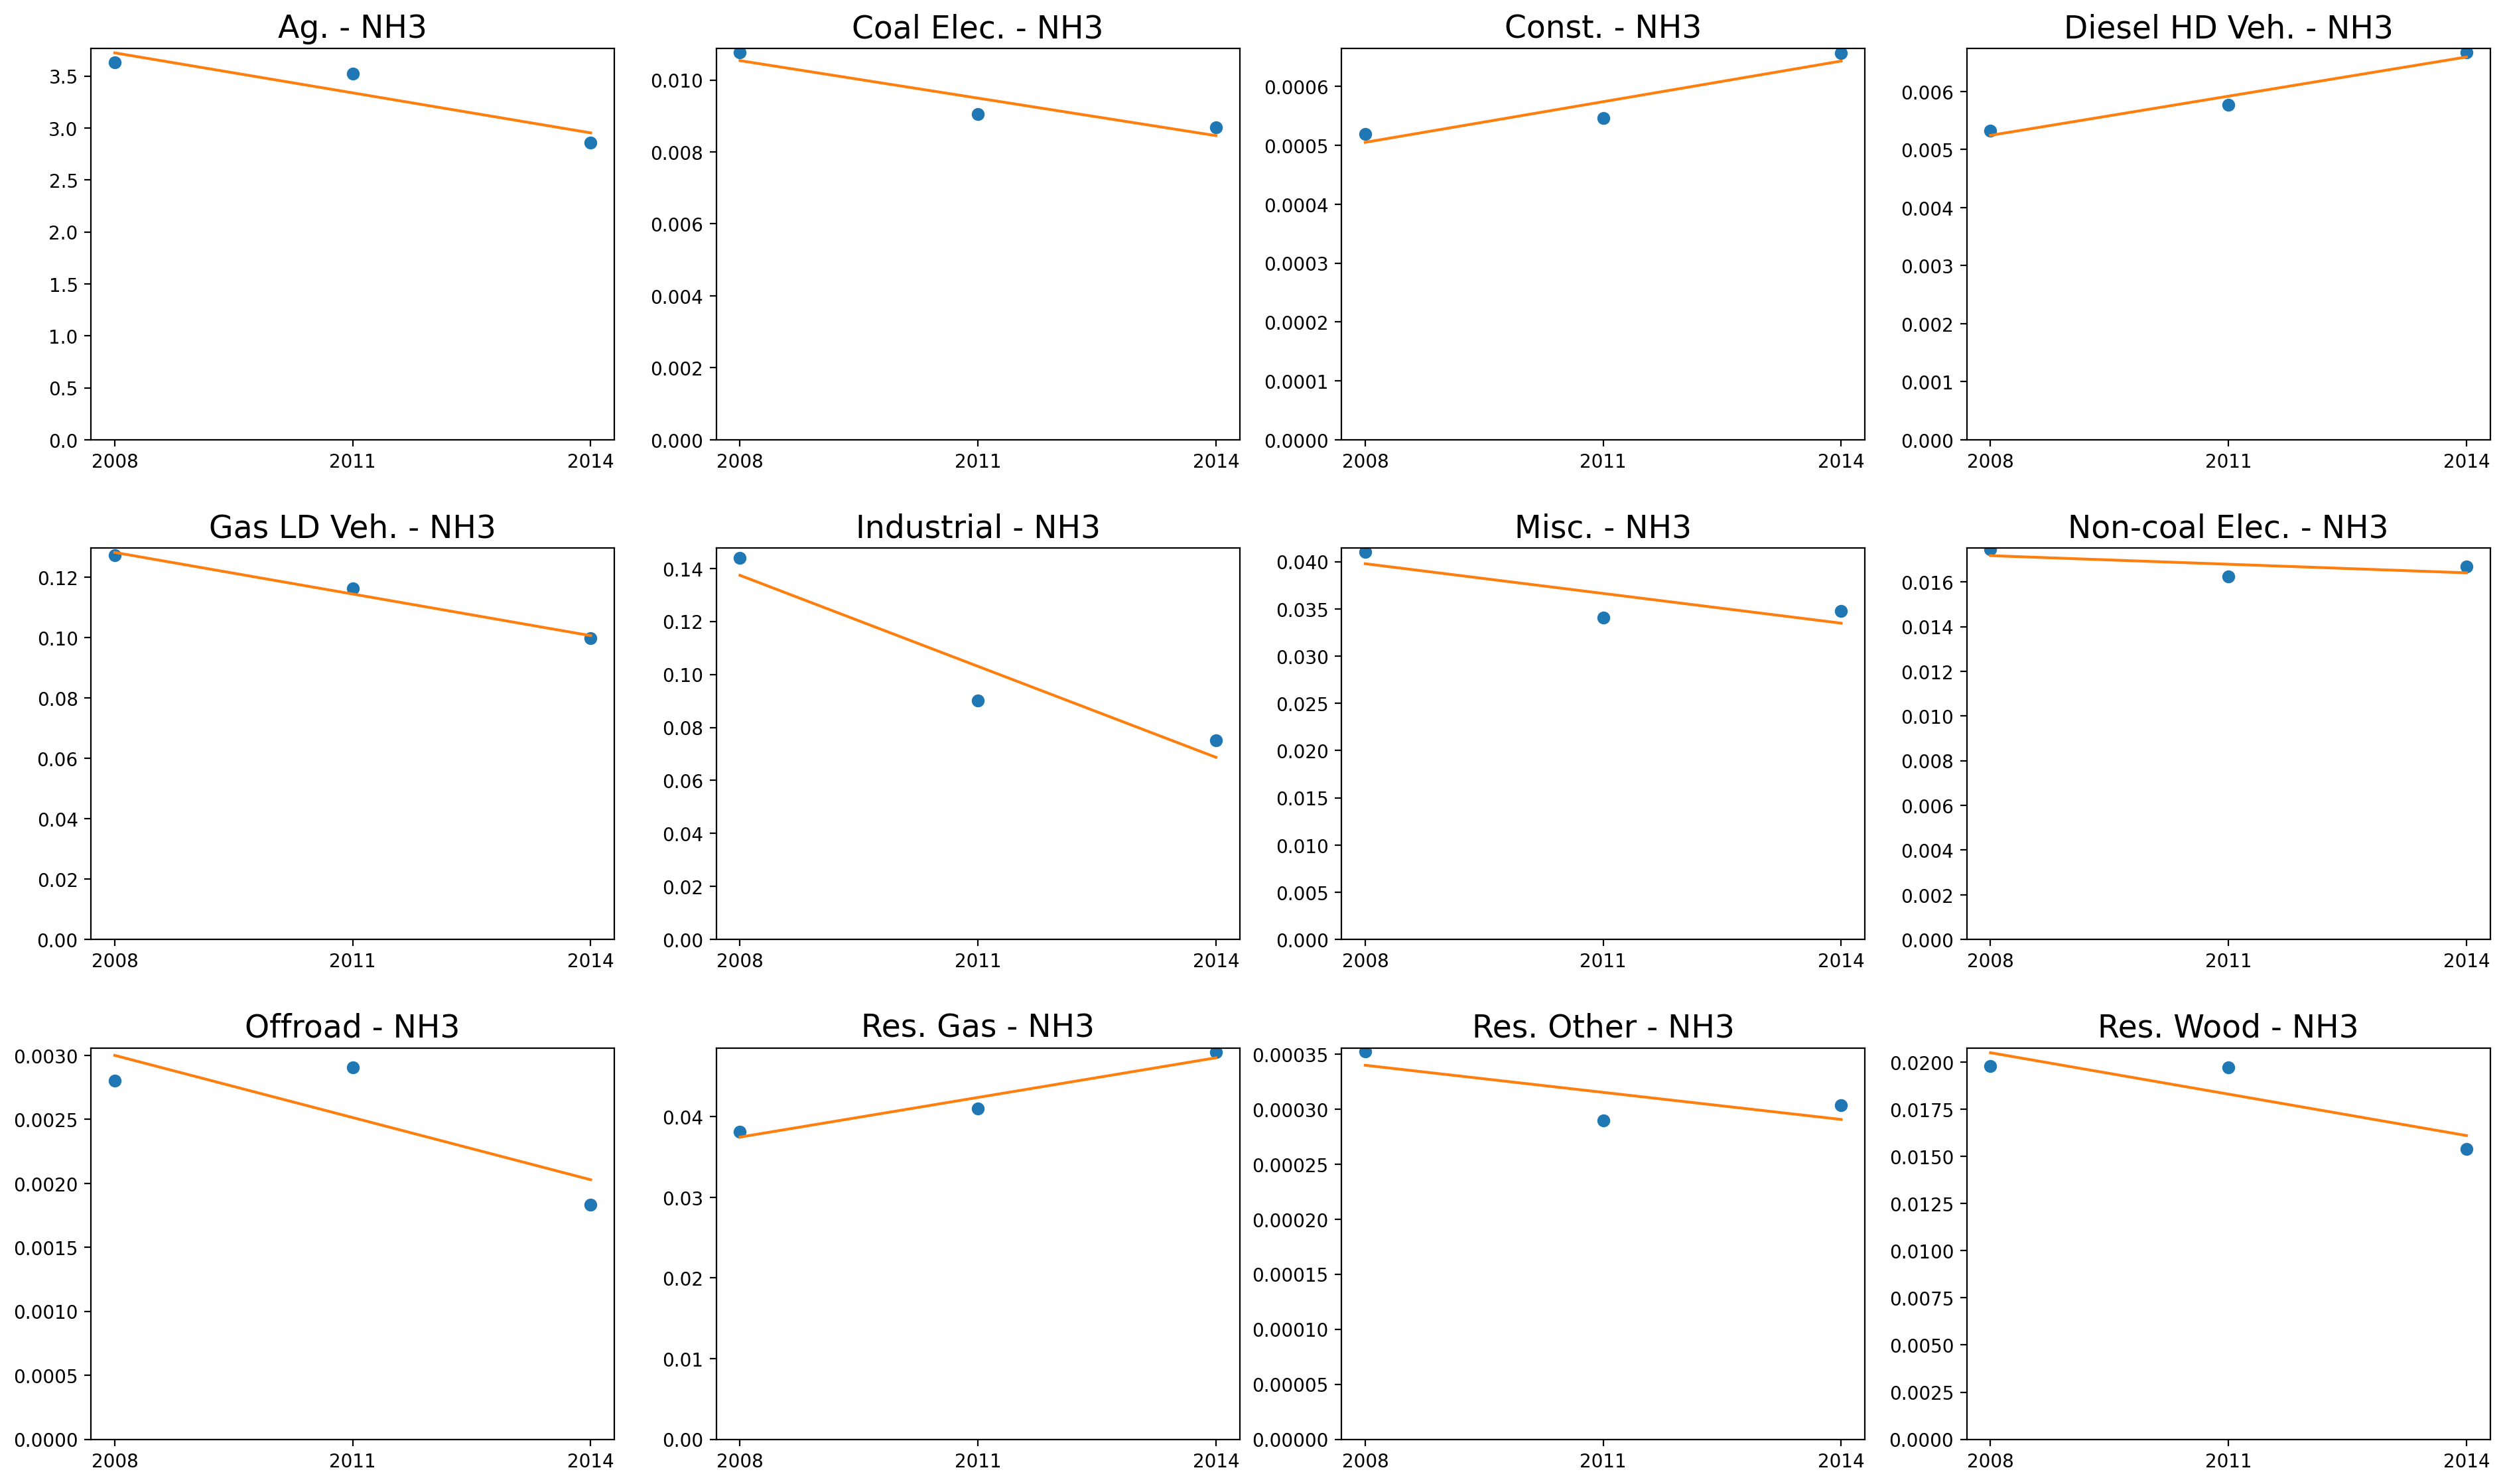

In [139]:
fig = plt.figure(figsize=(19,12),dpi = 200)
#fig.suptitle("Disparity",fontsize = 22)
emission_sum_sector_pollution_new_rename_NH3 = emission_sum_sector_by_pollutant[emission_sum_sector_by_pollutant["pollutant"]=="NH3"].reset_index(drop = True)
slope_list_NH3_0814 = []
for i in range(emission_sum_sector_pollution_new_rename_NH3.shape[0]):
    ax = plt.subplot(4,4, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    test = emission_sum_sector_pollution_new_rename_NH3.iloc[[i]]
    cols_to_keep = [c for c in test.columns[11:14] if test.loc[i,c] >100]
    test = test[cols_to_keep]
    
    emis_list_i = test.loc[i].values.astype(float)/1e6
    year_array_i = test.columns.values.astype(int)
    ax.plot(year_array_i,emis_list_i, 'o')
    m, b = np.polyfit(year_array_i,emis_list_i, 1)
    slope_list_NH3_0814.append(-m)
    ax.plot(year_array_i, m*year_array_i+b)
    ax.set_xticks([2008,2011,2014])
    #ax.axis('off')
    # set the title
    ax.set_title(emission_sum_sector_pollution_new_rename_NH3["sector"][i]+" - "+emission_sum_sector_pollution_new_rename_NH3["pollutant"][i],size = 17)
    ax.set_ylim(ymin = 0)# set the aspect
    # adjustable datalim ensure that the plots have the same axes size
    #ax.set_aspect('equal', adjustable='datalim')
plt.tight_layout()
fig.subplots_adjust(top=1.2)


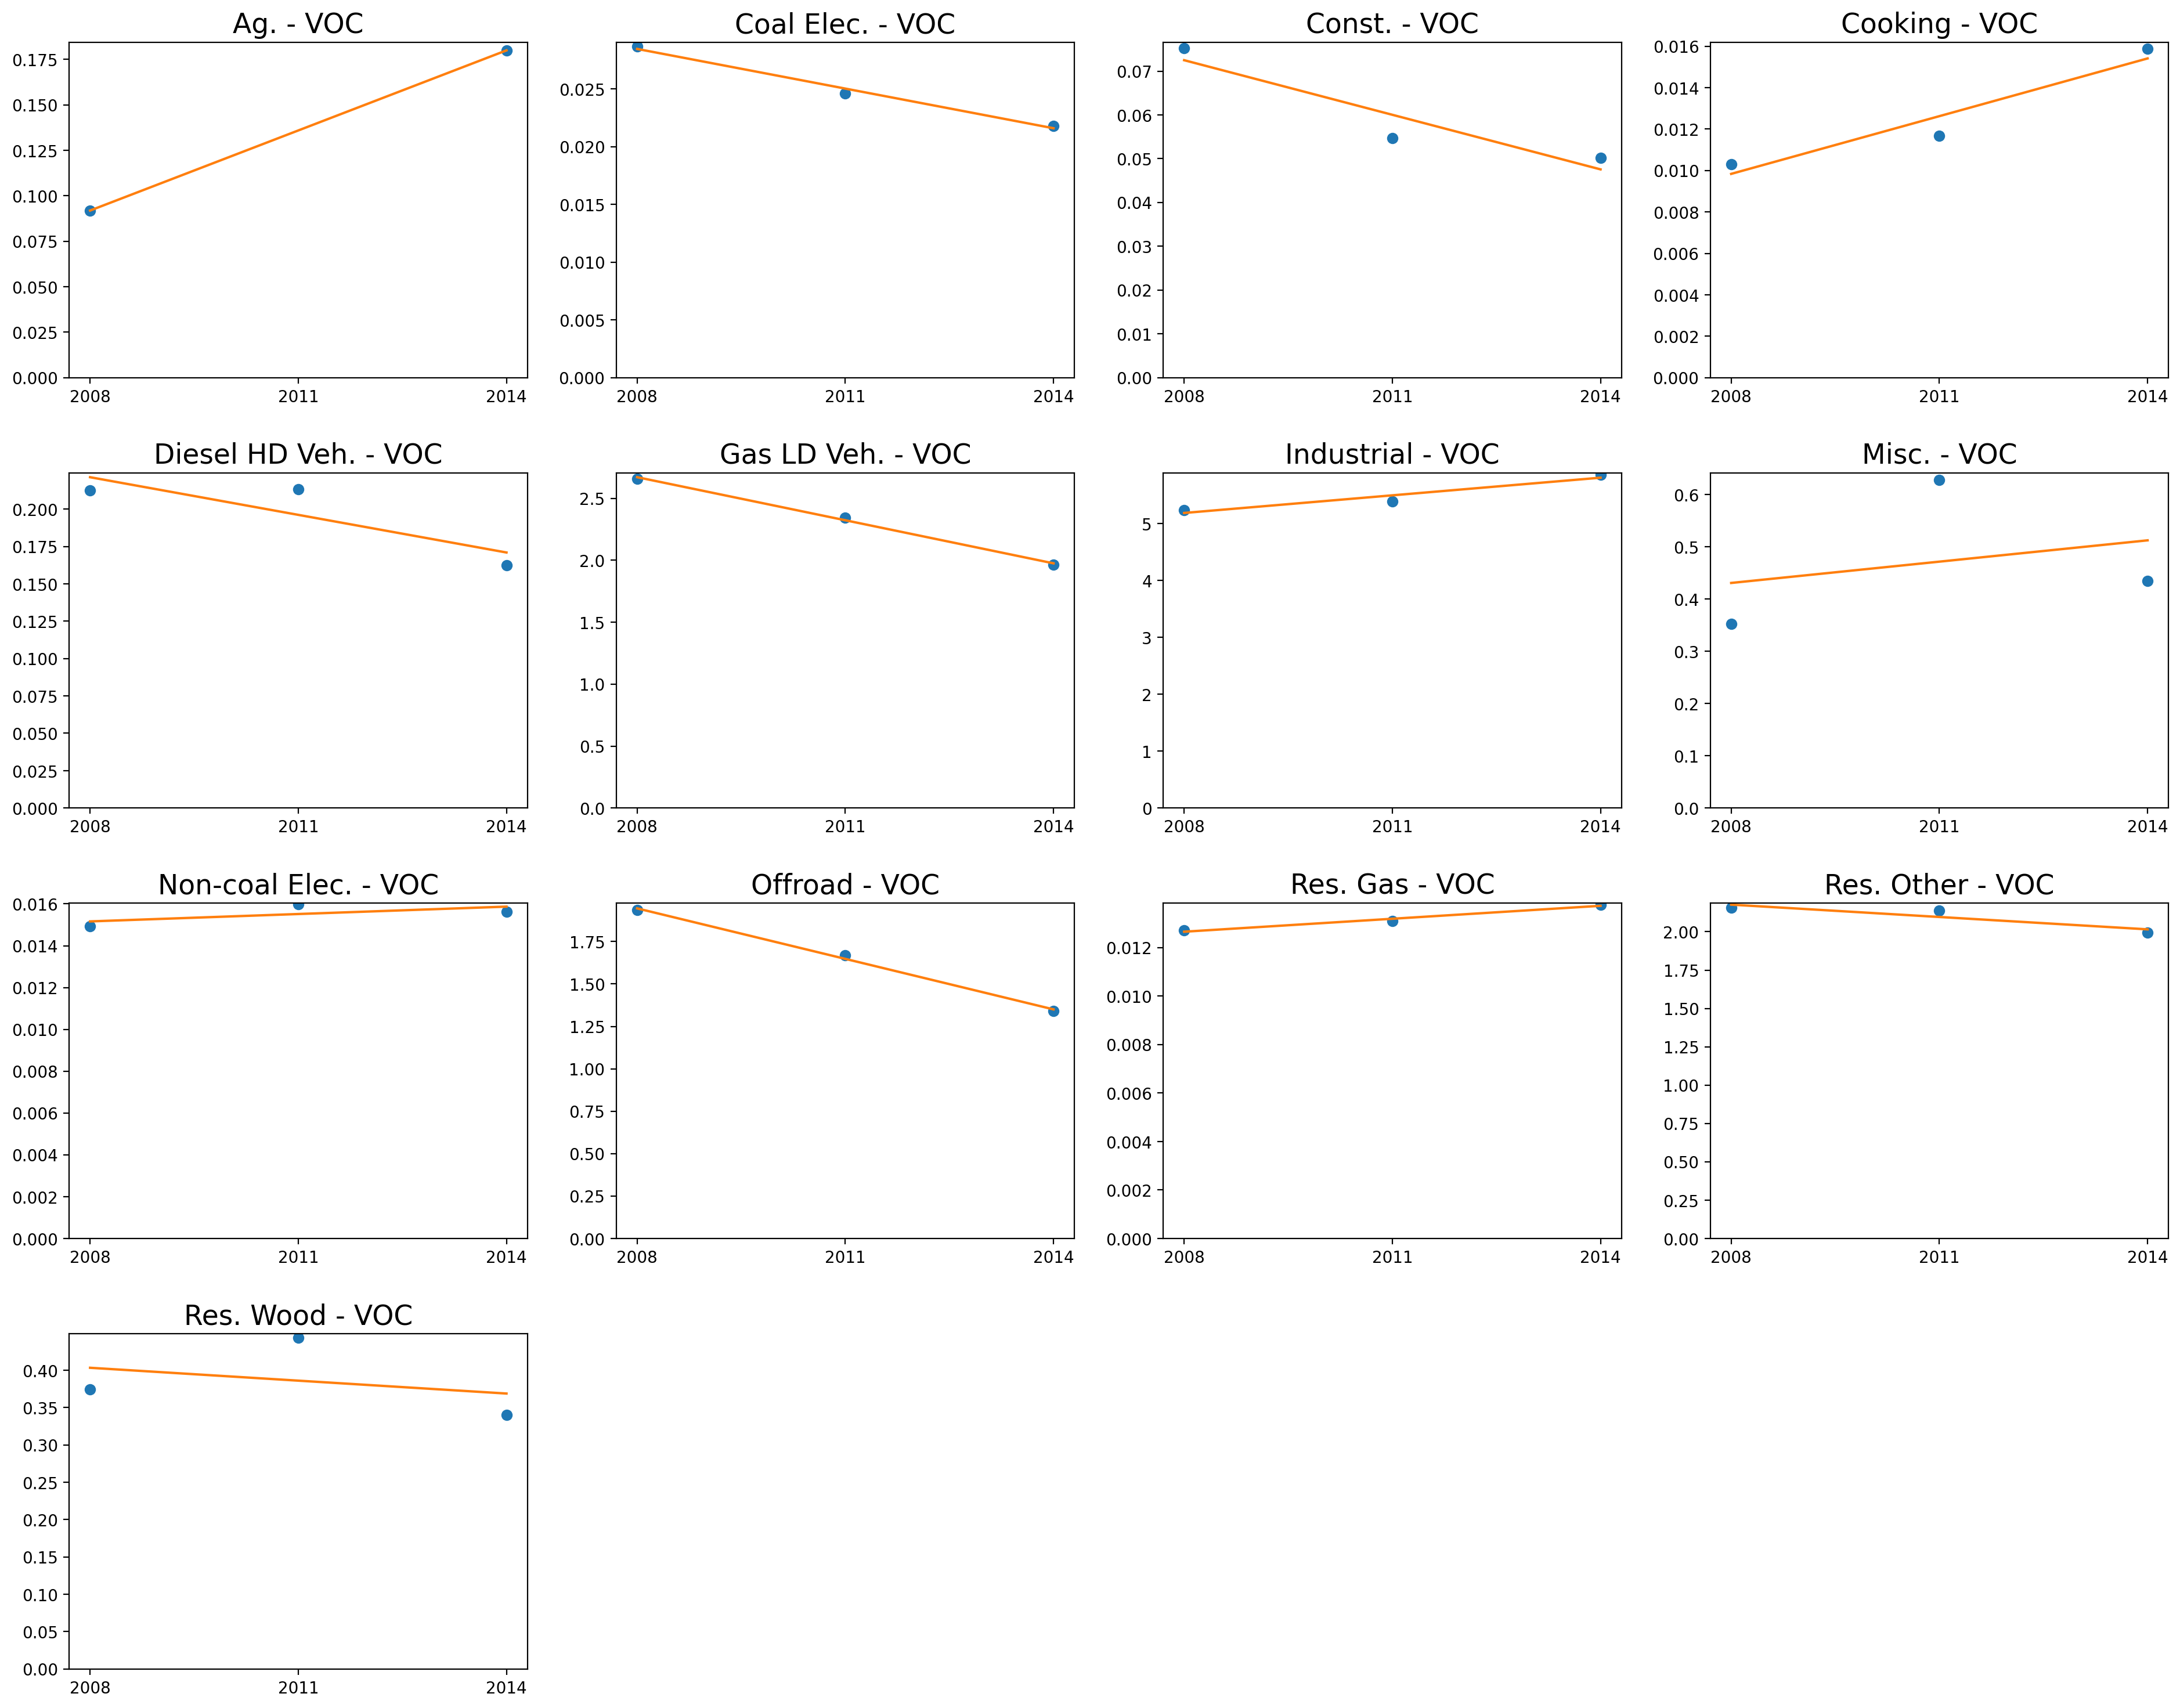

In [140]:
fig = plt.figure(figsize=(19,12),dpi = 200)
#fig.suptitle("Disparity",fontsize = 22)
emission_sum_sector_pollution_new_rename_VOC = emission_sum_sector_by_pollutant[emission_sum_sector_by_pollutant["pollutant"]=="VOC"].reset_index(drop = True)
slope_list_VOC_0814 = []
for i in range(emission_sum_sector_pollution_new_rename_VOC.shape[0]):
    ax = plt.subplot(4,4, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    test = emission_sum_sector_pollution_new_rename_VOC.iloc[[i]]
    cols_to_keep = [c for c in test.columns[11:14] if test.loc[i,c] >100]
    test = test[cols_to_keep]
    
    emis_list_i = test.loc[i].values.astype(float)/1e6
    year_array_i = test.columns.values.astype(int)
    ax.plot(year_array_i,emis_list_i, 'o')
    m, b = np.polyfit(year_array_i,emis_list_i, 1)
    slope_list_VOC_0814.append(-m)
    ax.plot(year_array_i, m*year_array_i+b)
    ax.set_xticks([2008,2011,2014])
    #ax.axis('off')
    # set the title
    ax.set_title(emission_sum_sector_pollution_new_rename_VOC["sector"][i]+" - "+emission_sum_sector_pollution_new_rename_VOC["pollutant"][i],size = 17)
    ax.set_ylim(ymin = 0)# set the aspect
    # adjustable datalim ensure that the plots have the same axes size
    #ax.set_aspect('equal', adjustable='datalim')
plt.tight_layout()
fig.subplots_adjust(top=1.2)


In [142]:
slope_list_pollutant_0814 = slope_list_PM_0814+slope_list_NOx_0814+slope_list_SOx_0814+slope_list_NH3_0814+slope_list_VOC_0814

emission_sum_sector_by_pollutant_0814 = pd.concat([emission_sum_sector_pollution_new_rename_PM,emission_sum_sector_pollution_new_rename_NO,
          emission_sum_sector_pollution_new_rename_SO,emission_sum_sector_pollution_new_rename_NH3,
          emission_sum_sector_pollution_new_rename_VOC])

emission_sum_sector_by_pollutant_0814["reduction_slope"] = slope_list_pollutant_0814

emission_sum_sector_by_pollutant_0814["change_percentage_14"] = emission_sum_sector_by_pollutant_0814["reduction_slope"]/emission_sum_sector_by_pollutant_0814[2014]*1e6*100


-8.158792641864613

In [143]:
emission_sum_sector_by_pollutant_0814.to_csv("../emission_sum_sector_by_pollutant_0814.csv")